# 📊 Projet d’Analyse des logs web NASA - Juillet 1995 avec Elasticsearch

Ce projet a pour objectif d'explorer et d'analyser les logs web publics de la NASA (juillet 1995), en utilisant **Python**, **Elasticsearch** et **Google Colab**.

## 🎯 Objectifs pédagogiques et techniques

Ce projet a pour objectif d'apprendre à :
- Comprendre la structure des logs web Apache (Common Log Format)
- Manipuler et parser des fichiers de logs en Python
- Indexer massivement des documents dans Elasticsearch
- Réaliser des recherches, filtres et agrégations (analyses, détection d’anomalies)
- Générer un rapport professionnel d’analyse et un mémo technique

## 🛠️ Environnement de travail
- **Google Colab** (exécution du code Python)
- **Google Drive** (stockage du projet et des fichiers)
- **Elasticsearch Cloud (v8.x)** (indexation et requêtes)
- **Python ≥ 3.10**

## 📁 Arborescence du projet (dans Google Drive)

```markdown                                                        
/Projet_NASA_Logs/
│
├── P0_Setup_Elastic.ipynb ← Connexion Colab ↔ Drive ↔ Elasticsearch
├── P1_Decouverte_Logs.ipynb ← Lecture et analyse des logs
├── P2_Parsing_Logs.ipynb ← Extraction des champs
├── P3_Mapping_Elastic.ipynb ← Définition du mapping
├── P4_Indexation.ipynb ← Envoi des documents vers Elasticsearch
├── P5_Requetes_Exploration.ipynb ← Recherches (IP, 404, etc.)
├── P6_Aggregations_Anomalies.ipynb← Analyse trafic, pics, erreurs
│
├── datasets/
│ └── NASA_access_log_Jul95.gz ← Données brute
├── reports/
│ └── indexation_reports.csv ← rapports
├── graphes/
│ └── urls.jpg ← images des visualisations
│
├── exports/
│ ├── sample_logs.csv ← Fichier parsé pour tests
│ └── rapport_final.pdf ← Rapport projet final
└── memo_cheatsheet.pdf ← Guide rapide pour projets similaires


# **1.Objectifs et livrables globaux**

| N° | Objectif pédagogique / métier                                       | Livrable final                                               |
| -- | ------------------------------------------------------------------- | ------------------------------------------------------------ |
| 1  | Comprendre le format *Common Log* et le pré-traiter en Python       | Notebook Colab «Exploration & Parsing»                     |
| 2  | Concevoir un mapping Elasticsearch adapté aux logs                  | Fichier JSON de mapping + script bulk                        |
| 3  | Indexer les 1,8M lignes du fichier **NASA\_access\_log\_Jul95.gz** | Index *nasa\_jul95* peuplé                                   |
| 4  | Réaliser recherches, filtrages et agrégations                       | Notebook «Requêtes & Analyses»                             |
| 5  | Détecter pics / anomalies (4xx-5xx, flood IP)                       | Notebook «Anomalies» + captures                            |
| 6  | Capitaliser                                                         | • Rapport.pdf de projet<br>• Mémo «Cheat-sheet» (2 pages) |



# **2.Prérequis techniques**

| Composant                 | Version conseillée                                                 | Raison                                    |
| ------------------------- | ------------------------------------------------------------------ | ----------------------------------------- |
| **Google Colab**          | Runtime Python≥3.10                                              | Environnement cloud gratuit               |
| **Python libs**           | `pandas`, `gzip`, `re`, `elasticsearch==8.x`, `tqdm`, `matplotlib` | Parsing, bulk, visualisation              |
| **Elasticsearch Service** | 8.x (Cloud Elastic ou Docker local)                                | Supporte API JSON et agrégations récentes |
| **Kibana** (option)       | 8.x                                                                | Visual sanity checks                      |
| **Compte GitHub / Drive** | —                                                                  | Stockage notebooks & scripts              |

---

# **3.Plan projet détaillé & critères de validation**

| Phase                               | Contenu clé                                                                                              | Livrables intermédiaires                   | Critères OK/KO                                                                     |
| ----------------------------------- | -------------------------------------------------------------------------------------------------------- | ------------------------------------------ | ---------------------------------------------------------------------------------- |
| **P0 - Kick-off & Setup**           | • Création repo / dossier<br>• Installation libs<br>• Vérification accès cluster                                | README+`requirements.txt`                | `pip list` montre libs, ping cluster ✅                                             |
| **P1 - Découverte & Préparation**   | • Décompression `.gz`<br>• Lecture premières 20 lignes<br>• Schéma de ligne commenté                     | Notebook «Exploration»                    | Tableau des champs (IP, ident, authuser, timestamp, request, status, bytes) validé |
| **P2 - Parsing Python**             | • Regex ou `str.split` robuste<br>• Gestion valeurs manquantes`-`<br>• Export sample CSV                | Notebook «Parsing» + CSV 1000 lignes     | >99% lignes parsées sans erreur                                                  |
| **P3 - Mapping Elasticsearch**      | • Définition types (`keyword`, `date`, `integer` …)<br>• Docstring justification                         | `mapping_nasa.json`                        | Index créé, mapping conforme, \_cat/mapping ✅                                      |
| **P4 - Indexation bulk**            | • Script chunk 5000 docs<br>• Bar progress `tqdm`<br>• Vérif `count`                                    | Notebook «Indexation»                     | 1.8M docs, `errors:false`                                                         |
| **P5 - Requêtes & Exploration**     | • Term queries (IP, 404)<br>• Match URL «images»<br>• Range date (05-06 Jul 95)                        | Notebook «Requêtes»                       | Requêtes retournent nb docs attendu                                                |
| **P6 - Agrégations & Anomalies**    | • date\_histogram hourly<br>• top 10 IP / URLs<br>• détection pics 4xx-5xx                               | Notebook « Analyses» + 2 graphes           | Pics identifiés & commentés                                                        |
| **P7 - Reporting & Capitalisation** | • Rapport PDF (contextes, code clés, résultats, limites)<br>• Mémo 2 pages (étapes & commandes usuelles) | `rapport_final.pdf`, `memo_cheatsheet.pdf` | Lisibilité, complétude, reproductibilité                                           |


---

## 🗂️ Sommaire

1. [Phase 1 : Préparation et parsing des données](#phase-1)
2. [Phase 2 : Transformation par lot et sauvegarde CSV](#phase-2)
   - [Étape 1 : Création du dossier d'export dans Google Drive](#creationfile)
   - [Étape 2 : Lecture et parsing par lots](#lecture21)
   -[Étape 3 : Transformation du batch en DataFrame ](#transformation)
   - [Étape 4 - Sauvegarde du batch dans un fichier CSV](#sauvegarde)
   - [Étape 5 : Boucle complète pour parser tout le fichier](#parse)
3. [Phase 3 : Mapping & Indexation Elasticsearch](#phase-3)
4. [Phase 4 : Vérification de l’indexation](#phase-4)
5. [Phase 5 : Requêtes analytiques (IPs, URLs, etc.)](#phase-5)
   - [Étape 1 - Requêtes simples](#simple)
   - [Étape 2 -  Filtres & recherche full-text](#full)
   - [Étape 3 - Requêtes booléennes](#booleennes)
   - [Étape 4 - Agrégations temporelles](#aggregations)


---

# ✅ PHASE P0 - Setup Colab & Connexion Elasticsearch

**🎯 Objectifs**

- Installer les bibliothèques nécessaires

- Connecter Google Drive à Colab

- Vérif```markdownier la connexion à ton cluster Elasticsearch à l'aide de l'URL + API Key

```markdown
📚 Bibliothèques Python à utiliser

| Bibliothèque    | Usage principal                          |
| --------------- | ---------------------------------------- |
| `elasticsearch` | Connexion au cluster et envoi de données |
| `pandas`        | Manipulation tabulaire des données       |
| `gzip`          | Décompression du fichier `.gz`           |
| `re`            | Regex pour parser les logs               |
| `tqdm`          | Progress bar pour indexation massive     |
| `json`          | Conversion des documents pour Elastic    |
| `matplotlib`    | Graphiques simples pour l'analyse        |
| `datetime`      | Gestion des formats de dates             |


In [3]:
#installation des bibliothèques
!pip install elasticsearch
!pip install pandas
!pip install tqdm
!pip install matplotlib
!pip install datetime
!pip install requests
!pip install elasticsearch-dsl
!pip install tabulate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.5/905.5 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.3/906.3 kB 12.4 MB/s eta 0:00:00
  Attempting uninstall: elasticsearch
    Found existing installation: elasticsearch 9.0.1
    Uninstalling elasticsearch-9.0.1:
      Successfully uninstalled elasticsearch-9.0.1


In [4]:
import json
import os
import pandas as pd
import gzip
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
from datetime import datetime
from elasticsearch import Elasticsearch
from elasticsearch.helpers import bulk
from tabulate import tabulate

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
print("Drive déconnecté.")

Drive déconnecté.


In [5]:
#connexion a googledrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from elasticsearch import Elasticsearch

# 🔁 REMPLACER avec tes infos perso
ELASTIC_URL = "https://my-elasticsearch-project-d88606.es.us-east-1.aws.elastic.cloud:443"
API_KEY = "dHFOSHNwWUJTYlhUTWUwWjVwa1M6RlcwWTdIQ1Q0QW5DaWlTcE5TeC1idw=="

es = Elasticsearch(
    ELASTIC_URL,
    api_key=API_KEY,
    verify_certs=True
)

# Test de connexion
try:
    print("✅ Connexion réussie :", es.info().body['cluster_name'])
except Exception as e:
    print("❌ Connexion échouée :", e)


✅ Connexion réussie : d886060151ed47be840b444ccb2ede5e


✅ Résumé de la phase P0 - Setup Elastic

| Élément                                              | Statut |
| ---------------------------------------------------- | ------ |
| Accès Google Drive                                   | ✅      |
| Installation bibliothèques (`elasticsearch`, `tqdm`) | ✅      |
| Importations nécessaires                             | ✅      |
| Connexion au cluster Elasticsearch (API Key + URL)   | ✅      |


**🔐 Cluster connecté : d886060151ed47be840b444ccb2ede5e**

---

## 🛠️ Phase 1 - Préparation et Parsing des Logs <a name="phase-1"></a>

### 🎯 Objectif :
- Lire et parser le fichier `NASA_access_log_Jul95.gz` ligne par ligne.
- Identifier la structure des lignes (format commun des logs Apache).
- Extraire les champs utiles : IP (host), ident, authuser, timestamp, request, status, bytes.

##🔧 Actions prévues
- Décompression du fichier .gz

- Affichage des 20 premières lignes (brutes)

- Extraction manuelle de la structure d'une ligne (à l'œil)

- Documentation de la structure sous forme de tableau (champ | exemple | commentaire)


### ⚠️ Décision :
- Utilisation d'une expression régulière pour extraire les champs.
- Parsing par batch sera utile plus tard pour éviter les surcharges mémoire.


In [7]:
#🔹 Étape 1 – Lecture des premières lignes du fichier .gz
# 🎯 Objectif : Afficher un aperçu brut (non encore parsé) des 20 premières lignes du fichier de logs.

import gzip

# Définir le chemin du fichier depuis Google Drive
log_path = '/content/drive/MyDrive/Projet_NASA_Logs/dataset/NASA_access_log_Jul95.gz'

# Lecture et affichage des 20 premières lignes
with gzip.open(log_path, 'rt', encoding='utf-8', errors='ignore') as f:
    for i in range(20):
        print(f"✅ Ligne {i+1}:", f.readline().strip())

✅ Ligne 1: 199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] "GET /history/apollo/ HTTP/1.0" 200 6245
✅ Ligne 2: unicomp6.unicomp.net - - [01/Jul/1995:00:00:06 -0400] "GET /shuttle/countdown/ HTTP/1.0" 200 3985
✅ Ligne 3: 199.120.110.21 - - [01/Jul/1995:00:00:09 -0400] "GET /shuttle/missions/sts-73/mission-sts-73.html HTTP/1.0" 200 4085
✅ Ligne 4: burger.letters.com - - [01/Jul/1995:00:00:11 -0400] "GET /shuttle/countdown/liftoff.html HTTP/1.0" 304 0
✅ Ligne 5: 199.120.110.21 - - [01/Jul/1995:00:00:11 -0400] "GET /shuttle/missions/sts-73/sts-73-patch-small.gif HTTP/1.0" 200 4179
✅ Ligne 6: burger.letters.com - - [01/Jul/1995:00:00:12 -0400] "GET /images/NASA-logosmall.gif HTTP/1.0" 304 0
✅ Ligne 7: burger.letters.com - - [01/Jul/1995:00:00:12 -0400] "GET /shuttle/countdown/video/livevideo.gif HTTP/1.0" 200 0
✅ Ligne 8: 205.212.115.106 - - [01/Jul/1995:00:00:12 -0400] "GET /shuttle/countdown/countdown.html HTTP/1.0" 200 3985
✅ Ligne 9: d104.aa.net - - [01/Jul/1995:00:00:13 -0400] "GET /shut

**🧠 Étape 2 :  Analyse manuelle de la structure d'une ligne**

**🎯 Objectif :**
Comprendre la structure exacte d’une ligne de log (Common Log Format) et en déduire les champs à extraire.

## 📑 Structure d'une ligne de log NASA (format "Common Log")

**Exemple :**
199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] "GET /history/apollo/ HTTP/1.0" 200 6245


**🧩 Structure analysée**


| Champ         | Exemple                           | Commentaire                                |
| ------------- | --------------------------------- | ------------------------------------------ |
| **host**      | `199.72.81.55`                    | Adresse IP ou nom d'hôte du client         |
| **ident**     | `-`                               | Identité RFC 1413 (souvent absente)        |
| **authuser**  | `-`                               | Nom de l'utilisateur HTTP (souvent absent) |
| **timestamp** | `[01/Jul/1995:00:00:01 -0400]`    | Date complète de la requête                |
| **request**   | `"GET /history/apollo/ HTTP/1.0"` | Ligne de requête HTTP                      |
| **status**    | `200`                             | Code HTTP (200, 404, etc.)                 |
| **bytes**     | `6245`                            | Taille de la réponse (en octets)           |




**🧠 Étape 3 - Réflexion sur le parsing en Python***

**🎯 Objectif**:
Préparer un code d'extraction automatique des champs depuis une ligne brute de log.

🔍 Approche retenue : expression régulière (regex)

Nous allons utiliser une expression régulière robuste pour extraire les champs suivants :

- host (IP ou nom)

- ident

- authuser

- timestamp

- request (méthode + chemin + protocole)

- status

- bytes

In [ ]:
#🧪 Regex prévue

import re

log_pattern = re.compile(
    r'(?P<host>\S+)\s+'               # host : IP ou hostname
    r'(?P<ident>\S+)\s+'              # ident : souvent '-'
    r'(?P<authuser>\S+)\s+'           # authuser : souvent '-'
    r'\[(?P<timestamp>[^\]]+)\]\s+'   # timestamp entre crochets []
    r'"(?P<request>[^"]*)"\s+'        # requête entre guillemets ""
    r'(?P<status>\d{3})\s+'           # code HTTP
    r'(?P<bytes>\S+)'                 # taille ou '-'
)

In [ ]:
#📦 Code de test du parsing sur les 5 premières lignes
with gzip.open(log_path, 'rt', encoding='utf-8', errors='ignore') as f:
    for i in range(5):
        line = f.readline().strip()
        match = log_pattern.match(line)
        if match:
            print(f"✅ Ligne {i+1} : {match.groupdict()}")
        else:
            print(f"❌ Ligne {i+1} non reconnue : {line}")

✅ Ligne 1 : {'host': '199.72.81.55', 'ident': '-', 'authuser': '-', 'timestamp': '01/Jul/1995:00:00:01 -0400', 'request': 'GET /history/apollo/ HTTP/1.0', 'status': '200', 'bytes': '6245'}
✅ Ligne 2 : {'host': 'unicomp6.unicomp.net', 'ident': '-', 'authuser': '-', 'timestamp': '01/Jul/1995:00:00:06 -0400', 'request': 'GET /shuttle/countdown/ HTTP/1.0', 'status': '200', 'bytes': '3985'}
✅ Ligne 3 : {'host': '199.120.110.21', 'ident': '-', 'authuser': '-', 'timestamp': '01/Jul/1995:00:00:09 -0400', 'request': 'GET /shuttle/missions/sts-73/mission-sts-73.html HTTP/1.0', 'status': '200', 'bytes': '4085'}
✅ Ligne 4 : {'host': 'burger.letters.com', 'ident': '-', 'authuser': '-', 'timestamp': '01/Jul/1995:00:00:11 -0400', 'request': 'GET /shuttle/countdown/liftoff.html HTTP/1.0', 'status': '304', 'bytes': '0'}
✅ Ligne 5 : {'host': '199.120.110.21', 'ident': '-', 'authuser': '-', 'timestamp': '01/Jul/1995:00:00:11 -0400', 'request': 'GET /shuttle/missions/sts-73/sts-73-patch-small.gif HTTP/1.0

## 🧹 Phase 2 - Parsing en lots et export CSV <a name="phase-2"></a>

*   List item
*   List item



### 🎯 Objectif :
- Parser toutes les lignes du fichier en **lots de 100000 lignes**.
- Nettoyer les données : remplacer `-` par 0 ou None.
- Extraire également l'**URL** du champ `request` pour des agrégations futures.

### ⚠️ Choix retenus :
- Ajout manuel du champ `url` car le champ `request` est de type `text` (non agrégable).
- Export des résultats batchés en CSV pour faciliter l’indexation.


---

**🧩 Phase P2 - Étape 1 : Création du dossier d'export dans Google Drive<a name="creationfile"></a>**

**🎯 Objectif :**
Créer un dossier exports/ dans ton Drive (si ce n’est pas déjà fait) pour y stocker les fichiers CSV batchés.

In [ ]:
import re
import pandas as pd
import os


# Dossier où enregistrer les exports
export_dir = "/content/drive/MyDrive/Projet_NASA_Logs/exports"

# Crée le dossier s’il n’existe pas
os.makedirs(export_dir, exist_ok=True)

print(f"✅ Dossier d'export prêt : {export_dir}")

✅ Dossier d'export prêt : /content/drive/MyDrive/Projet_NASA_Logs/exports


---

**🧩 Phase P2 - Étape 2 : Lecture et parsing par lots<a name="lecture21"></a>**

**🎯 Objectif :**
Lire le fichier .gz ligne par ligne, parser chaque ligne avec la regex, et stocker les données par lots de 10 000 lignes dans une liste.

In [ ]:
# Taille du lot (batch)
batch_size = 100000

# Initialisation
batch = []
batch_count = 0
total_lines = 0
ignored_lines = 0

with gzip.open(log_path, 'rt', encoding='utf-8', errors='ignore') as f:
    for line in f:
        total_lines += 1
        match = log_pattern.match(line.strip())
        if match:
            data = match.groupdict()
            data['bytes'] = int(data['bytes']) if data['bytes'].isdigit() else 0
            data['status'] = int(data['status'])
            batch.append(data)
        else:
            ignored_lines += 1

        # Si le lot est plein, on arrête ici pour l'étape 2
        if len(batch) == batch_size:
            print(f"✅ Batch prêt : {len(batch)} lignes parsées (à sauvegarder)")
            break

print(f"📊 Total lignes lues : {total_lines}")
print(f"✅ Lignes valides : {len(batch)}")
print(f"❌ Lignes ignorées : {ignored_lines}")

✅ Batch prêt : 100000 lignes parsées (à sauvegarder)
📊 Total lignes lues : 100000
✅ Lignes valides : 100000
❌ Lignes ignorées : 0


---

**🚀 Phase P2 - Étape 3 : Transformation du batch en DataFrame <a name="transformation"></a>**

**🎯 Objectif :**
Transformer les 100 000 lignes parsées (batch) en un tableau (DataFrame) structuré avec pandas.

In [ ]:
# Transformer le batch en tableau
df_batch = pd.DataFrame(batch)

# Afficher les 5 premières lignes
print(df_batch.shape)
df_batch.head()

(100000, 7)


,host,ident,authuser,timestamp,request,status,bytes
0,199.72.81.55,-,-,01/Jul/1995:00:00:01 -0400,GET /history/apollo/ HTTP/1.0,200,6245
1,unicomp6.unicomp.net,-,-,01/Jul/1995:00:00:06 -0400,GET /shuttle/countdown/ HTTP/1.0,200,3985
2,199.120.110.21,-,-,01/Jul/1995:00:00:09 -0400,GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085
3,burger.letters.com,-,-,01/Jul/1995:00:00:11 -0400,GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0
4,199.120.110.21,-,-,01/Jul/1995:00:00:11 -0400,GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179


---

**💾 Étape 4 - Sauvegarde du batch dans un fichier CSV<a name="sauvegarde"></a>**

**🎯 Objectif :**
Enregistrer le contenu de df_batch dans le dossier exports/, sous un nom structuré.

In [ ]:
# Numéro de batch
batch_count = 0

# Chemin du fichier à enregistrer
csv_path = f'/content/drive/MyDrive/Projet_NASA_Logs/exports/logs_batch_{batch_count}.csv'

# Sauvegarde du DataFrame
df_batch.to_csv(csv_path, index=False)

print(f"✅ Batch {batch_count} sauvegardé dans : {csv_path}")

✅ Batch 0 sauvegardé dans : /content/drive/MyDrive/Projet_NASA_Logs/exports/logs_batch_0.csv


**🧩 Phase 2 - Étape 5 : Boucle complète pour parser tout le fichier<a name="parse"></a>**

**🎯 Objectif :**
- Parcourir toutes les lignes du fichier .gz

- Les parser par lots de 100 000

- Sauvegarder chaque lot sous forme de logs_batch_X.csv

- Afficher des compteurs clairs pour suivre l'avancement

In [ ]:
batch_size = 300_000
batch = []
batch_count = 0
total_lines = 0
ignored_lines_total = 0

with gzip.open(log_path, 'rt', encoding='utf-8', errors='ignore') as f:
    for line in f:
        total_lines += 1
        match = log_pattern.match(line.strip())
        if match:
            data = match.groupdict()
            data['bytes'] = int(data['bytes']) if data['bytes'].isdigit() else 0
            data['status'] = int(data['status'])
            batch.append(data)
        else:
            ignored_lines_total += 1

        # Quand un batch est rempli, on l’enregistre
        if len(batch) == batch_size:
            df_batch = pd.DataFrame(batch)
            csv_path = f"{export_dir}/logs_batch_{batch_count}.csv"
            df_batch.to_csv(csv_path, index=False)
            print(f"✅ Batch {batch_count} sauvegardé ({len(batch)} lignes)")
            batch_count += 1
            batch = []  # Réinitialiser le lot

# Enregistrer les lignes restantes si le fichier ne tombe pas pile sur un multiple de batch_size
if batch:
    df_batch = pd.DataFrame(batch)
    csv_path = f"{export_dir}/logs_batch_{batch_count}.csv"
    df_batch.to_csv(csv_path, index=False)
    print(f"✅ Dernier batch {batch_count} sauvegardé ({len(batch)} lignes)")

# Résumé
print("")
print("---- Statistiques que parsing ----")
print("")
print("🔚 Parsing terminé")
print(f"📦 Taille d'un lot : {batch_size}")
print(f"📄 Lignes totales lues : {total_lines}")
print(f"✅ Total lignes parsées : {total_lines - ignored_lines_total}")
print(f"❌ Total lignes ignorées : {ignored_lines_total}")
print(f"📁 Fichiers créés : {batch_count + 1}")

✅ Batch 0 sauvegardé (300000 lignes)
✅ Batch 1 sauvegardé (300000 lignes)
✅ Batch 2 sauvegardé (300000 lignes)
✅ Batch 3 sauvegardé (300000 lignes)
✅ Batch 4 sauvegardé (300000 lignes)
✅ Batch 5 sauvegardé (300000 lignes)
✅ Dernier batch 6 sauvegardé (91700 lignes)

---- Statistiques que parsing ----

🔚 Parsing terminé
📦 Taille d'un lot : 300000
📄 Lignes totales lues : 1891715
✅ Total lignes parsées : 1891700
❌ Total lignes ignorées : 15
📁 Fichiers créés : 7


**🟢 Phase P2 – Finalisée avec succès**

🎯 Les données sont désormais :

🔹 Complètement extraites et nettoyées

🔹 Découpées par batchs

🔹 Prêtes à être indexées dans Elasticsearch

---

## 🏗️ Phase 3 – Mapping et Indexation dans Elasticsearch <a name="phase-3"></a>

### 🎯 Objectif :
Définir le mapping (schéma) pour indexer les logs dans Elasticsearch :
- Choisir le type de chaque champ (keyword, integer, date, etc.).
- Spécifier le format de date.
- Justifier les choix
- Créer un fichier JSON de mapping (ou un script Python pour le push)

### ⚠️ Notes :
- Champ `timestamp` formaté selon `dd/MMM/yyyy:HH:mm:ss Z`.
- Champ `url` ajouté manuellement pour permettre les agrégations.


**🧩 Étape 1 - Proposition de mapping Elasticsearch**

**🎯 Objectif :**
Créer un schéma Elasticsearch adapté aux logs, qui définisse pour chaque champ :

- Le type (keyword, date, integer, etc.)

- Le format, notamment pour les dates

- Une justification claire de chaque choix


**🔍 Rappel des champs à indexer**

| Champ       | Exemple                                |
| ----------- | -------------------------------------- |
| `host`      | `199.72.81.55` ou `burger.letters.com` |
| `ident`     | `-` (souvent vide)                     |
| `authuser`  | `-` (souvent vide)                     |
| `timestamp` | `01/Jul/1995:00:00:01 -0400`           |
| `request`   | `GET /history/apollo/ HTTP/1.0`        |
| `status`    | `200`                                  |
| `bytes`     | `6245`                                 |

In [ ]:
{
  "mappings": {
    "properties": {
      "host": {
        "type": "keyword"
      },
      "ident": {
        "type": "keyword"
      },
      "authuser": {
        "type": "keyword"
      },
      "timestamp": {
        "type": "date",
        "format": "dd/MMM/yyyy:HH:mm:ss Z"
      },
      "request": {
        "type": "text"
      },
      "status": {
        "type": "integer"
      },
      "bytes": {
        "type": "integer"
      }
    }
  }
}

{'mappings': {'properties': {'host': {'type': 'keyword'},
   'ident': {'type': 'keyword'},
   'authuser': {'type': 'keyword'},
   'timestamp': {'type': 'date', 'format': 'dd/MMM/yyyy:HH:mm:ss Z'},
   'request': {'type': 'text'},
   'status': {'type': 'integer'},
   'bytes': {'type': 'integer'}}}}

**✅ Justification des choix**

| Champ       | Type      | Raison                                                                |
| ----------- | --------- | --------------------------------------------------------------------- |
| `host`      | `keyword` | Utilisé pour des recherches exactes (filtrage par IP ou hostname)     |
| `ident`     | `keyword` | Peu utilisé, mais doit rester brut                                    |
| `authuser`  | `keyword` | Pareil que `ident`, identifiant exact                                 |
| `timestamp` | `date`    | Permet les recherches temporelles, agrégations (`range`, `histogram`) |
| `request`   | `text`    | Contient des URLs + méthodes : utile pour des recherches full-text    |
| `status`    | `integer` | Pour faire des filtres ou statistiques (ex. erreurs 4xx, 5xx)         |
| `bytes`     | `integer` | Pour calculer le trafic transféré                                     |

---

**🔧 Option 1 - Fichier mapping_nasa.json (manuel)**

📂 **Contenu**

- Un fichier .json que tu peux :

- Charger dans un outil comme Kibana / DevTools

- Utiliser avec des commandes curl ou Postman

- Modifier facilement à la main

➕ **Avantages**

✅ Flexible, lisible, partageable

✅ Compatible avec interface web d'Elastic (DevTools)

✅ Bon pour une approche pédagogique

---

🐍 **Option 2 - Script Python pour créer l'index**

📦 **Contenu**

Un script Python qui :

- Connecte à ton cluster

- Supprime l'index s'il existe déjà

- Crée l'index avec le mapping directement

➕ **Avantages**

✅ Automatisé, réutilisable

✅ Tu peux tout faire depuis Google Colab

✅ Idéal pour une chaîne de traitement complète

---

🧠 **Recommandation pédagogique**

👉 Comme tu travailles dans Google Colab, je recommande de commencer par :

✅ Option 2 : Script Python
Pour rester 100 % dans ton flux d'automatisation, sans passer par l'interface Kibana.

In [ ]:
from elasticsearch import Elasticsearch
from elasticsearch.exceptions import RequestError

# 📌 Nom de l'index que tu veux créer
index_name = "nasa_logs_jul95"

# ✅ Mapping JSON (même que celui vu précédemment)
mapping = {
    "mappings": {
        "properties": {
            "host":      { "type": "keyword" },
            "ident":     { "type": "keyword" },
            "authuser":  { "type": "keyword" },
            "timestamp": { "type": "date", "format": "dd/MMM/yyyy:HH:mm:ss Z" },
            "request":   { "type": "text" },
            "status":    { "type": "integer" },
            "bytes":     { "type": "integer" }
        }
    }
}

# 📍 Connexion (réutilise les variables définies précédemment)
es = Elasticsearch(
    ELASTIC_URL,
    api_key=API_KEY,
    verify_certs=True
)

# 🔁 Supprimer l'index s'il existe déjà (attention ⚠️)
if es.indices.exists(index=index_name):
    es.indices.delete(index=index_name)
    print(f"🗑️ Ancien index supprimé : {index_name}")

# 🛠️ Créer l'index avec le mapping
try:
    es.indices.create(index=index_name, body=mapping)
    print(f"✅ Index créé avec succès : {index_name}")
except RequestError as e:
    print(f"❌ Erreur lors de la création : {e.info}")

🗑️ Ancien index supprimé : nasa_logs_jul95
✅ Index créé avec succès : nasa_logs_jul95


**Capture d'écra de l'index crée en ligne de code**


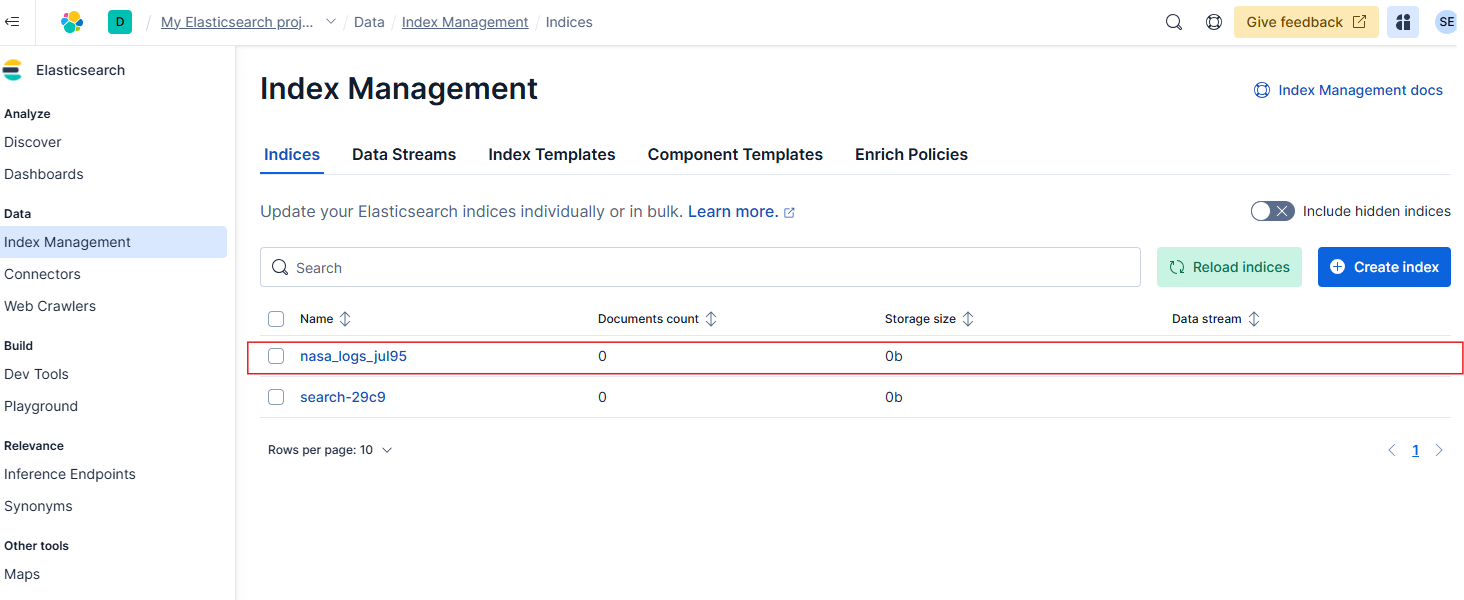

In [ ]:
#Script pour traiter tout les lot automatiquement
#import glob

#def generate_actions(df):
#    for doc in df.to_dict(orient="records"):
#        yield {
#            "_index": "nasa_logs_jul95",
#            "_source": doc
#        }

#for file in sorted(glob.glob(EXPORTS_DIR + "/*.csv")):
#    df = pd.read_csv(file)
#    success, _ = bulk(es, generate_actions(df))
#    print(f"{file.split('/')[-1]} : ✅ {success} documents indexés")

## 🔍 Phase 4 - Vérification de l'indexation <a name="phase-4"></a>

### 🎯 Objectif :
Indexer dans Elasticsearch tous les documents extraits et nettoyés à la phase P2, en s'appuyant sur le mapping défini en P3.

Cela rendra les logs :

- recherchables (par IP, code HTTP, période, etc.)

- filtrables (ex. : tous les 404)

- agrégeables (ex. : nombre de requêtes par heure)

- prêts pour les analyses avancées (Phase P5)

### ⚠️ Notes :
- L'index contient plusieurs centaines de milliers de lignes.
- Une vérification par `search` simple est suffisante.


---

**📦 Phase 4 - Étape 1 - Chargement d'un fichier CSV (test sur logs_batch_0.csv)**

**🎯 Objectif :**

- Charger le fichier logs_batch_0.csv

- Convertir chaque ligne en dictionnaire (JSON)

- Préparer les documents pour envoi à Elasticsearch

In [ ]:
# Charger le fichier CSV
csv_path = '/content/drive/MyDrive/Projet_NASA_Logs/exports/logs_batch_0.csv'
df = pd.read_csv(csv_path)

# Afficher les 5 premières lignes
print(f"✅ Fichier chargé : {csv_path}")
print("")
print(df.shape)
print("")
df.head()

✅ Fichier chargé : /content/drive/MyDrive/Projet_NASA_Logs/exports/logs_batch_0.csv

(300000, 7)



,host,ident,authuser,timestamp,request,status,bytes
0,199.72.81.55,-,-,01/Jul/1995:00:00:01 -0400,GET /history/apollo/ HTTP/1.0,200,6245
1,unicomp6.unicomp.net,-,-,01/Jul/1995:00:00:06 -0400,GET /shuttle/countdown/ HTTP/1.0,200,3985
2,199.120.110.21,-,-,01/Jul/1995:00:00:09 -0400,GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085
3,burger.letters.com,-,-,01/Jul/1995:00:00:11 -0400,GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0
4,199.120.110.21,-,-,01/Jul/1995:00:00:11 -0400,GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179


---

**🧱 Phase 4 - Étape 2 -  Préparation des documents JSON**

**🎯 Objectif :**
Transformer ton DataFrame en une liste de dictionnaires au format attendu par Elasticsearch, via bulk().

In [ ]:
# Transformer le DataFrame en liste de dictionnaires
docs = df.to_dict(orient='records')

# Afficher un exemple
print(f"✅ {len(docs)} documents préparés")
print("Exemple :", docs[0])

✅ 300000 documents préparés
Exemple : {'host': '199.72.81.55', 'ident': '-', 'authuser': '-', 'timestamp': '01/Jul/1995:00:00:01 -0400', 'request': 'GET /history/apollo/ HTTP/1.0', 'status': 200, 'bytes': 6245}


---

**📤 Phase 4 - Étape 3 -  Indexation via bulk() (sur un lot)**

**🎯 Objectif :**

- Envoyer les documents préparés (docs) dans l’index nasa_logs_jul95

- Utiliser le module bulk() de la bibliothèque elasticsearch.helpers

- Afficher un retour clair : nombre de succès / échecs

In [ ]:
from elasticsearch.helpers import bulk
import time
import psutil
import os

# Initialisation
index_name = "nasa_logs_jul95"
batch_size = 30000
success_count = 0
error_count = 0

process = psutil.Process(os.getpid())
start_global = time.time()

# Fonction pour générer les actions
def generate_actions(docs):
    for doc in docs:
        yield {
            "_index": index_name,
            "_source": doc
        }

# Boucle d’envoi
for i in range(0, len(docs), batch_size):
    batch = docs[i:i+batch_size]
    start = time.time()

    try:
        success, _ = bulk(es, generate_actions(batch))
        duration = round(time.time() - start, 2)
        mem_mb = round(process.memory_info().rss / 1024 / 1024, 2)
        cpu_percent = psutil.cpu_percent(interval=0.1)

        success_count += success
        print(f"✅ Batch {i//batch_size} | {success} docs | {duration}s | RAM: {mem_mb}MB | CPU: {cpu_percent}%")
    except Exception as e:
        print(f"❌ Erreur batch {i//batch_size} :", str(e))
        error_count += len(batch)

# Résumé global
end_global = time.time()
total_time = round(end_global - start_global, 2)

print("🔚 Indexation terminée")
print("")
print(f"✅ Total indexés : {success_count}")
print(f"❌ Total erreurs : {error_count}")
print(f"⏱️ Temps total : {total_time} secondes")

✅ Batch 0 | 30000 docs | 21.45s | RAM: 568.07MB | CPU: 9.1%
✅ Batch 1 | 30000 docs | 22.12s | RAM: 568.07MB | CPU: 90.5%
✅ Batch 2 | 30000 docs | 20.85s | RAM: 568.07MB | CPU: 65.0%
✅ Batch 3 | 30000 docs | 21.01s | RAM: 568.07MB | CPU: 0.0%
✅ Batch 4 | 30000 docs | 20.63s | RAM: 568.07MB | CPU: 52.4%
✅ Batch 5 | 30000 docs | 21.41s | RAM: 568.07MB | CPU: 5.0%
✅ Batch 6 | 30000 docs | 21.76s | RAM: 568.07MB | CPU: 0.0%
✅ Batch 7 | 30000 docs | 21.15s | RAM: 568.07MB | CPU: 57.9%
✅ Batch 8 | 30000 docs | 21.11s | RAM: 568.07MB | CPU: 5.0%
✅ Batch 9 | 30000 docs | 21.99s | RAM: 568.07MB | CPU: 5.0%
🔚 Indexation terminée

✅ Total indexés : 300000
❌ Total erreurs : 0
⏱️ Temps total : 214.5 secondes


---

**✅ Étape de Vérification dans Elasticsearch**

**🎯 Objectif :**
- Vérifier que les documents sont bien enregistrés

- Confirmer le bon formatage des données dans l'index

- Voir un échantillon des logs indexés

In [ ]:
# Vérification du nombre de documents dans l'index
count = es.count(index="nasa_logs_jul95")['count']
print(f"📊 Documents indexés dans 'nasa_logs_jul95' : {count}")

📊 Documents indexés dans 'nasa_logs_jul95' : 0


In [ ]:
# Afficher un échantillon
result = es.search(index="nasa_logs_jul95", size=5, query={"match_all": {}})
for i, doc in enumerate(result['hits']['hits'], 1):
    print(f"🔹 Document {i} : {doc['_source']}")

**🔁 Phase 4 - Étape 4 -   Boucle d'indexation de tous les fichiers logs_batch_X.csv**

**🎯 Objectif :**

- Indexe chaque fichier par lots (30 000 lignes par défaut (bulk())

- ⏱️ 3. Mesure les performances de chaque fichier :
         - Temps total
         - Taille du fichier
         - RAM utilisée
         - % CPU
         - Nombre de lignes indexées / erreurs

- 🧠 Enregistre pour chaque fichier :

         - Nom du fichier
         - Nb de documents indexés
         - Erreurs
         - Temps de traitement
         - RAM et CPU utilisés

- 📄Génère un rapport CSV indexation_report.csv avec résumé par fichier

- 💾 Enregistre ce rapport dans /reports/indexation_report.csv

- 📊 Affiche un aperçu final du tableau dans le notebook

In [ ]:
import os

# Créer le dossier "reports" dans Google Drive s'il n'existe pas
reports_dir = '/content/drive/MyDrive/Projet_NASA_Logs/reports'
os.makedirs(reports_dir, exist_ok=True)

print(f"✅ Dossier 'reports' prêt : {reports_dir}")

✅ Dossier 'reports' prêt : /content/drive/MyDrive/Projet_NASA_Logs/reports


In [ ]:
import pandas as pd
import glob
import time
import psutil
import os
from elasticsearch.helpers import bulk
from elasticsearch import Elasticsearch

# Connexion à Elasticsearch (doit réutiliser les variables existantes dans ton notebook)
es = Elasticsearch(ELASTIC_URL, api_key=API_KEY)

# Paramètres
index_name = "nasa_logs_jul95"
batch_size = 30000
export_dir = '/content/drive/MyDrive/Projet_NASA_Logs/exports'
reports_dir = '/content/drive/MyDrive/Projet_NASA_Logs/reports'

# Fichiers CSV à indexer
csv_files = sorted(glob.glob(os.path.join(export_dir, "logs_batch_*.csv")))

# Pour collecter les stats
report_data = []
process = psutil.Process(os.getpid())

# Indexation fichier par fichier
for file_path in csv_files:
    file_name = os.path.basename(file_path)
    print(f"\n📄 Traitement de : {file_name}")

    df = pd.read_csv(file_path)
    docs = df.to_dict(orient='records')
    success_count = 0
    error_count = 0
    start_time = time.time()

    for i in range(0, len(docs), batch_size):
        batch = docs[i:i+batch_size]
        try:
            success, _ = bulk(es, (
                {"_index": index_name, "_source": doc} for doc in batch
            ))
            success_count += success
        except Exception as e:
            print(f"❌ Erreur dans le batch {i//batch_size} :", str(e))
            error_count += len(batch)

    end_time = time.time()
    mem_mb = round(process.memory_info().rss / 1024 / 1024, 2)
    cpu_percent = psutil.cpu_percent(interval=0.1)
    duration = round(end_time - start_time, 2)

    report_data.append({
        "fichier": file_name,
        "documents": len(docs),
        "indexés": success_count,
        "erreurs": error_count,
        "temps_s": duration,
        "RAM_MB": mem_mb,
        "CPU_%": cpu_percent
    })

# Génération du DataFrame rapport
df_report = pd.DataFrame(report_data)

# Sauvegarde CSV
report_path = os.path.join(reports_dir, "indexation_report.csv")
df_report.to_csv(report_path, index=False)

# Affichage dans le notebook
from tabulate import tabulate
print("\n📊 Rapport d'indexation Elasticsearch (aperçu) :")
print(tabulate(df_report.head(), headers='keys', tablefmt='pretty'))

print(f"\n✅ Rapport sauvegardé : {report_path}")


📄 Traitement de : logs_batch_0.csv

📄 Traitement de : logs_batch_1.csv

📄 Traitement de : logs_batch_2.csv

📄 Traitement de : logs_batch_3.csv

📄 Traitement de : logs_batch_4.csv

📄 Traitement de : logs_batch_5.csv

📄 Traitement de : logs_batch_6.csv

📊 Rapport d'indexation Elasticsearch (aperçu) :
+---+------------------+-----------+---------+---------+---------+--------+-------+
|   |     fichier      | documents | indexés | erreurs | temps_s | RAM_MB | CPU_% |
+---+------------------+-----------+---------+---------+---------+--------+-------+
| 0 | logs_batch_0.csv |  300000   | 300000  |    0    | 216.12  | 631.1  |  0.0  |
| 1 | logs_batch_1.csv |  300000   | 300000  |    0    | 219.89  | 629.97 |  0.0  |
| 2 | logs_batch_2.csv |  300000   | 300000  |    0    | 218.61  | 624.55 | 52.6  |
| 3 | logs_batch_3.csv |  300000   | 300000  |    0    | 217.69  | 629.68 |  0.0  |
| 4 | logs_batch_4.csv |  300000   | 300000  |    0    | 215.62  | 610.72 | 60.0  |
+---+------------------+---

**Capture d'écran de mon elasticsearch**

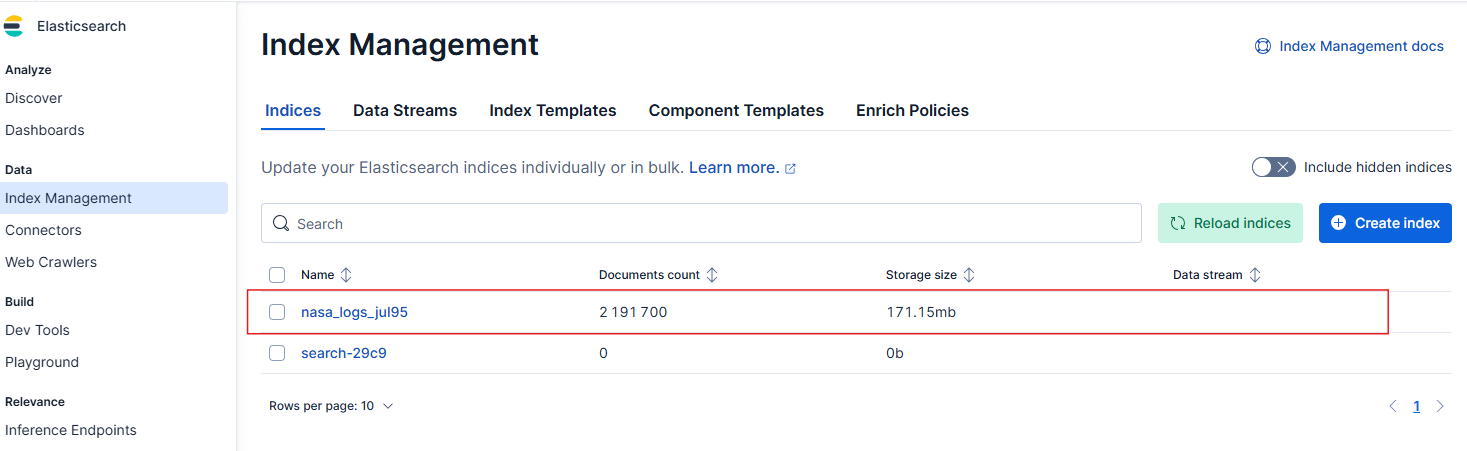

In [ ]:
res = es.search(index="nasa_logs_jul95", size=5)
for doc in res['hits']['hits']:
    print(doc['_source'])

## 📈 Phase 5 – Requêtes analytiques <a name="phase-5"></a>

### 🎯 Objectif :
- Explorer, interroger et analyser les logs web indexés dans Elasticsearch pour extraire des insights sur le trafic:
  - Top IPs
  - Top URLs
  - Nombre de requêtes par heure

### ⚠️ Précision :
- `request` étant un champ de type `text`, il ne permet pas l’agrégation `terms`.
- La solution a été d’extraire un champ `url` au moment du parsing.


### 📂 Étapes de la Phase 5

| Étape | Objectif                                                                    | Type de requête                            |
| ----- | --------------------------------------------------------------------------- | ------------------------------------------ |
| 5.1   | 🔍 Recherche simple : requêtes par IP ou code HTTP                          | `term`                                     |
| 5.2   | 🧾 Filtres & recherche full-text : URLs contenant un mot clé, logs par date | `match`, `range`                           |
| 5.3   | 🤝 Requêtes booléennes combinées (ex : IP + code 4xx/5xx)                   | `bool` (`must`, `should`, `filter`)        |
| 5.4   | 📈 Agrégations temporelles : nombre de requêtes par heure                   | `date_histogram`                           |
| 5.5   | 🧠 Agrégations top N : top IPs, top URLs demandées                          | `terms`                                    |
| 5.6   | 🚨 Détection d’anomalies : pics d’activité, erreurs anormales               | combinaison de `range` + `terms` + `stats` |
| 5.7   | ✅ Requêtes personnalisées : selon ton besoin ou hypothèse métier            | libre                                      |



---

**🔍  Phase 5 - Étape 1 -  Requêtes simples <a name="simple"></a>**

**🎯 Objectif :**

Faire des recherches basiques sur les logs via :

- une IP précise
- un code de retour HTTP (ex. : 404)

In [ ]:
# Recherche IP 199.72.81.55
ip_query = {
    "query": {
        "term": {
            "host": "199.72.81.55"
        }
    }
}

response = es.search(index="nasa_logs_jul95", query=ip_query["query"], size=5)

for i, hit in enumerate(response['hits']['hits'], 1):
    print(f"🔹 Requête {i} : {hit['_source']}")

🔹 Requête 1 : {'host': '199.72.81.55', 'ident': '-', 'authuser': '-', 'timestamp': '01/Jul/1995:22:29:49 -0400', 'request': 'GET / HTTP/1.0', 'status': 304, 'bytes': 0}
🔹 Requête 2 : {'host': '199.72.81.55', 'ident': '-', 'authuser': '-', 'timestamp': '01/Jul/1995:22:29:51 -0400', 'request': 'GET /images/NASA-logosmall.gif HTTP/1.0', 'status': 304, 'bytes': 0}
🔹 Requête 3 : {'host': '199.72.81.55', 'ident': '-', 'authuser': '-', 'timestamp': '01/Jul/1995:22:29:54 -0400', 'request': 'GET /images/WORLD-logosmall.gif HTTP/1.0', 'status': 304, 'bytes': 0}
🔹 Requête 4 : {'host': '199.72.81.55', 'ident': '-', 'authuser': '-', 'timestamp': '01/Jul/1995:22:31:52 -0400', 'request': 'GET /mdss/MDSS.html HTTP/1.0', 'status': 200, 'bytes': 2727}
🔹 Requête 5 : {'host': '199.72.81.55', 'ident': '-', 'authuser': '-', 'timestamp': '01/Jul/1995:22:31:55 -0400', 'request': 'GET /mdss/s_md-2.gif HTTP/1.0', 'status': 200, 'bytes': 15528}


In [ ]:
# Recherche http statut 404
error_query = {
    "query": {
        "term": {
            "status": 404
        }
    }
}

response = es.search(index="nasa_logs_jul95", query=error_query["query"], size=5)

for i, hit in enumerate(response['hits']['hits'], 1):
    print(f"❌ Code 404 - Ligne {i} : {hit['_source']}")

❌ Code 404 - Ligne 1 : {'host': '148.4.9.217', 'ident': '-', 'authuser': '-', 'timestamp': '05/Jul/1995:14:10:09 -0400', 'request': 'GET /history/apollo/a-001/a-001-patch-small.gif HTTP/1.0', 'status': 404, 'bytes': 0}
❌ Code 404 - Ligne 2 : {'host': '148.4.9.217', 'ident': '-', 'authuser': '-', 'timestamp': '05/Jul/1995:14:10:37 -0400', 'request': 'GET /history/apollo/a-001/images/ HTTP/1.0', 'status': 404, 'bytes': 0}
❌ Code 404 - Ligne 3 : {'host': 'cad100.cadvision.com', 'ident': '-', 'authuser': '-', 'timestamp': '05/Jul/1995:14:12:34 -0400', 'request': 'GET /pub.win3.winvn HTTP/1.0', 'status': 404, 'bytes': 0}
❌ Code 404 - Ligne 4 : {'host': 'bastion.sware.com', 'ident': '-', 'authuser': '-', 'timestamp': '05/Jul/1995:14:17:13 -0400', 'request': 'GET /history/apollo/sa-9/sa-9-patch-small.gif HTTP/1.0', 'status': 404, 'bytes': 0}
❌ Code 404 - Ligne 5 : {'host': 'bastion.sware.com', 'ident': '-', 'authuser': '-', 'timestamp': '05/Jul/1995:14:18:33 -0400', 'request': 'GET /history/a

---

**🔍  Phase 5 - Étape 2.1 -  Rechercher les URLs contenant le mot "images<a name="full"></a>**

**🎯 Objectif :**

Trouver toutes les requêtes dont le champ request contient le mot "images"
👉 Utile pour repérer les accès aux dossiers ou fichiers d'images.

In [ ]:
# 5.2.1 - Recherche full-text sur "images" dans les requêtes

query_images = {
    "query": {
        "match": {
            "request": "images"
        }
    }
}

response = es.search(index="nasa_logs_jul95", query=query_images["query"], size=5)

for i, hit in enumerate(response['hits']['hits'], 1):
    print(f"🖼️ Requête {i} : {hit['_source']['request']}")

🖼️ Requête 1 : GET /images 
🖼️ Requête 2 : GET /images/ 
🖼️ Requête 3 : GET /images 
🖼️ Requête 4 : GET /images 
🖼️ Requête 5 : GET /images/ 


---

**🔍  Phase 5 - Étape 2.2 -  Rechercher les logs entre le 5 juillet et le 6 juillet 1995**

**🎯 Objectif :**

Récupérer tous les logs dont la date (timestamp) est entre : 1995-07-05T00:00:00 - 1995-07-06T23:59:59

In [ ]:
# 5.2.2 - Rechercher tous les logs entre le 5 et le 6 juillet 1995

query_date_range = {
    "query": {
        "range": {
            "timestamp": {
                "gte": "05/Jul/1995:00:00:00 -0400",
                "lte": "06/Jul/1995:23:59:59 -0400"
            }
        }
    }
}

response = es.search(index="nasa_logs_jul95", query=query_date_range["query"], size=5)

for i, hit in enumerate(response['hits']['hits'], 1):
    print(f"🗓️ Requête {i} : {hit['_source']['timestamp']} — {hit['_source']['request']}")

🗓️ Requête 1 : 05/Jul/1995:14:07:42 -0400 — GET /history/apollo/images/footprint-small.gif HTTP/1.0
🗓️ Requête 2 : 05/Jul/1995:14:07:43 -0400 — GET /shuttle/missions/sts-71/mission-sts-71.html HTTP/1.0
🗓️ Requête 3 : 05/Jul/1995:14:07:43 -0400 — GET /shuttle/missions/sts-71/movies/sts-71-launch-3.mpg HTTP/1.0
🗓️ Requête 4 : 05/Jul/1995:14:07:50 -0400 — GET /history/apollo/apollo-13/apollo-13-patch-small.gif HTTP/1.0
🗓️ Requête 5 : 05/Jul/1995:14:07:50 -0400 — GET /images/launch-logo.gif HTTP/1.0


---

**🔍  Phase 5 - Étape 3 - Requêtes booléennes<a name="booleennes"></a>**

**🎯 Objectif :**

Combiner plusieurs conditions pour affiner les recherches :

- exemple :Trouver toutes les requêtes de l’IP 199.72.81.55 ayant généré des erreurs 4xx ou 5xx.

In [ ]:
# 5.3.1 - Requêtes de l'IP 199.72.81.55 avec erreur HTTP (4xx ou 5xx)

query_bool = {
    "query": {
        "bool": {
            "must": [
                { "term": { "host": "199.72.81.55" } }
            ],
            "filter": {
                "range": {
                    "status": {
                        "gte": 400,
                        "lte": 599
                    }
                }
            }
        }
    }
}

response = es.search(index="nasa_logs_jul95", query=query_bool["query"], size=5)

for i, hit in enumerate(response['hits']['hits'], 1):
    print(f"❗ Requête {i} : status={hit['_source']['status']} | {hit['_source']['request']}")

❗ Requête 1 : status=404 | GET /://spacelink.msfc.nasa.gov HTTP/1.0
❗ Requête 2 : status=404 | GET /://spacelink.msfc.nasa.gov HTTP/1.0


**🔍 Résumé de l'étape 5.3.1**

| Condition                               | Résultat |
| --------------------------------------- | -------- |
| IP = `199.72.81.55`                     | ✅        |
| Statut HTTP = `4xx` ou `5xx`            | ✅        |
| Total résultats = `3`                   | ✅        |
| Données cohérentes dans les deux outils | ✅        |

**💡 Observation :**

L'URL GET **/://spacelink.msfc.nasa.gov** est probablement mal formée (/://), ce qui justifie les erreurs 404 → voilà un exemple d'analyse de qualité des URLs qui pourra t'être utile dans la suite.

---

**🔍  Phase 5 - Étape 4 - Agrégations temporelles<a name="aggregations"></a>**

**🎯 Objectif :**

Compter le nombre de requêtes par heure, pour détecter les pics d'activité sur la période du fichier.

In [ ]:
# 5.4.1 - Agrégation du nombre de requêtes par heure

aggregation_query = {
    "size": 0,
    "aggs": {
        "requêtes_par_heure": {
            "date_histogram": {
                "field": "timestamp",
                "calendar_interval": "hour",
                "format": "yyyy-MM-dd HH:mm"
            }
        }
    }
}

response = es.search(index="nasa_logs_jul95", body=aggregation_query)

for bucket in response['aggregations']['requêtes_par_heure']['buckets'][:5]:  # Affiche les 5 premières heures
    print(f"🕒 {bucket['key_as_string']} : {bucket['doc_count']} requêtes")

🕒 1995-07-01 04:00 : 7130 requêtes
🕒 1995-07-01 05:00 : 6008 requêtes
🕒 1995-07-01 06:00 : 4536 requêtes
🕒 1995-07-01 07:00 : 3468 requêtes
🕒 1995-07-01 08:00 : 2964 requêtes


**✅ Prochaine étape**

Maintenant, pour visualiser ces données avec un graphique (par exemple avec matplotlib ou plotly), nous allons :

🎯 Objectif :
Créer un graphique du nombre de requêtes par heure.

🔧 Étapes du script à exécuter :

- Exécuter la requête d'agrégation dans Elasticsearch.

- Extraire les résultats (buckets).

- Convertir les données en DataFrame.

- Tracer un graphique des requêtes par heure.
---


In [ ]:
from elasticsearch import Elasticsearch
import json
import os
from google.colab import drive

# 🔌 Connexion à Elasticsearch avec les variables définies
es = Elasticsearch(
    ELASTIC_URL,
    api_key=API_KEY
)

# 📊 Requête d’agrégation par heure
query = {
    "size": 0,
    "aggs": {
        "requests_per_hour": {
            "date_histogram": {
                "field": "timestamp",
                "calendar_interval": "1h"
            }
        }
    }
}

# 📥 Exécution de la requête sur l’index correct
response = es.search(index="nasa_logs_jul95", body=query)

# ✅ Convertir l’objet ObjectApiResponse en dict
response_dict = response.body

# 💾 Sauvegarde locale
local_filename = "aggregations_by_hour.json"
with open(local_filename, "w") as f:
    json.dump(response_dict, f, indent=2)

print(f"✅ Fichier enregistré localement : {local_filename}")

# 📁 Dossier "exports" dans le Drive
drive_filename = os.path.join(export_dir, local_filename)

# 📤 Sauvegarde dans le Drive
with open(drive_filename, "w") as f:
    json.dump(response_dict, f, indent=2)

print(f"📁 Fichier également enregistré dans Drive : {drive_filename}")

✅ Fichier enregistré localement : aggregations_by_hour.json
📁 Fichier également enregistré dans Drive : /content/drive/MyDrive/Projet_NASA_Logs/exports/aggregations_by_hour.json


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import shutil

# Charger les données
with open("aggregations_by_hour.json", "r") as f:
    data = json.load(f)

buckets = data['aggregations']['requests_per_hour']['buckets']
df = pd.DataFrame([{'date': b['key_as_string'], 'count': b['doc_count']} for b in buckets])
df['date'] = pd.to_datetime(df['date'], format='%d/%b/%Y:%H:%M:%S %z', errors='coerce')

# Créer le graphique
plt.figure(figsize=(10, 4))
plt.plot(df['date'], df['count'], marker='o')
plt.title("Nombre de requêtes par heure")
plt.xlabel("Date")
plt.ylabel("Nombre de requêtes")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Enregistrer en local
local_path = "graph_requetes_par_heure.png"
plt.savefig(local_path)
print(f"✅ Graphique enregistré localement : {local_path}")
print("")

# Déplacer dans le dossier "graphes" du Drive
graphe_dir = "/content/drive/MyDrive/Projet_NASA_Logs/graphes"
os.makedirs(graphe_dir, exist_ok=True)  # Créer le dossier si nécessaire
shutil.copy(local_path, os.path.join(graphe_dir, local_path))
print(f"📁 Dossier des graphes défini : {graphe_dir}")
print("")
print(f"📁 Graphique également enregistré dans Drive : {graphe_dir}/{local_path}")
print("")

KeyError: 'date'

---

**🎯 Objectif :** Identifier les IPs les plus actives
Analyser le comportement du trafic :

- Identifier les utilisateurs (ou bots) les plus présents dans les logs.

- Repérer des usages intensifs potentiellement anormaux.

**Détection de comportements suspects ou anormaux :**
- Une seule IP effectuant un très grand nombre de requêtes peut indiquer :

- Une attaque (ex : DDoS, brute force),

- Un crawler intensif,

- Ou une utilisation légitime massive (serveur miroir, robot d'indexation…).

**Optimisation et filtrage futur :**

- Cela permet de définir des règles de filtrage, de blacklist ou de priorisation de trafic.

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from elasticsearch import Elasticsearch
from elasticsearch.helpers import scan
from google.colab import drive
from tabulate import tabulate

# Connexion à Elasticsearch
es = Elasticsearch(
    ELASTIC_URL,
    api_key=API_KEY
)


# Requête Top 10 IPs
query = {
    "size": 0,
    "aggs": {
        "top_ips": {
            "terms": {
                "field": "host",
                "size": 10
            }
        }
    }
}

response = es.search(index="nasa_logs_jul95", body=query)
buckets = response["aggregations"]["top_ips"]["buckets"]

# 📄 Enregistrement JSON
json_path = os.path.join(export_dir, "top_ips.json")
with open(json_path, "w") as f:
    json.dump(buckets, f, indent=2)
print(f"✅ Fichier JSON enregistré : {json_path}")
print("")

# 📊 Création DataFrame
df_top_ips = pd.DataFrame(buckets)
df_top_ips.rename(columns={"key": "host", "doc_count": "count"}, inplace=True)
print(tabulate(df_top_ips, headers='keys', tablefmt='fancy_grid'))
print("")

# 📊 Génération du graphique
ips = [bucket["key"] for bucket in buckets]
counts = [bucket["doc_count"] for bucket in buckets]

# 📈 Graphe
plt.figure(figsize=(10, 6))
plt.bar(df_top_ips["host"], df_top_ips["count"])
plt.xlabel("IP")
plt.ylabel("Nombre de requêtes")
plt.title("Top 10 IPs les plus actives")
plt.xticks(rotation=45)
plt.tight_layout()

# Enregistrement graphe
image_path = os.path.join(graphe_dir, "top_ips.png")
plt.savefig(image_path)
plt.show()
print("")
print(f"📁 Graphe sauvegardé : {image_path}")

✅ Fichier JSON enregistré : /content/drive/MyDrive/Projet_NASA_Logs/exports/top_ips.json





KeyError: 'host'

<Figure size 1000x600 with 0 Axes>

**🔍 Analyse du tableau**

| Rang | Hôte/IP              | Nombre de requêtes | Observation principale                                           |
| ---- | -------------------- | ------------------ | ---------------------------------------------------------------- |
| 1    | piweba3y.prodigy.com | 21 537             | Loin devant tous les autres.                                     |
| 2    | piweba4y.prodigy.com | 12 211             | Deuxième serveur Prodigy.                                        |
| 3    | piweba1y.prodigy.com | 11 525             | Troisième serveur Prodigy.                                       |
| 4    | alyssa.prodigy.com   | 10 266             | Encore un serveur Prodigy.                                       |
| 5    | siltb10.orl.mmc.com  | 7 573             | Serveur de la société MMC (probablement entreprise/centre R\&D). |
| 6    | piweba2y.prodigy.com | 6 890             | Dernier des 4 serveurs piweba\*.                                 |
| 7    | edams.ksc.nasa.gov   | 5 870             | Interne à la NASA (Kennedy Space Center).                        |
| 8    | news.ti.com          | 5 820             | Texas Instruments (serveur de news ?).                           |
| 9    | disarray.demon.co.uk | 5 512             | Fournisseur d'accès britannique (Demon Internet).                |
| 10   | 163.206.89.4         | 5 044              | Adresse IP brute (pas de résolution DNS).                        |

---

**🧠 Interprétation globale**

**Domination de Prodigy :**

- 5 des 10 premières entrées proviennent du domaine prodigy.com.

Cela indique probablement un gros volume de trafic généré automatiquement (peut-être des serveurs de cache ou des robots).

**Activité d'organisations :**

- ksc.nasa.gov représente des accès internes à la NASA, donc surveillance ou test internes.

- ti.com (Texas Instruments) suggère un intérêt scientifique ou académique.

**Utilisation mixte :**

- Des domaines personnels ou commerciaux (comme demon.co.uk) montrent que des utilisateurs divers consultaient les serveurs.

**Présence d'une IP brute :**

- 163.206.89.4 n'a pas été résolue en nom de domaine : soit faute de DNS, soit volonté de masquer.

---

📊 **Conclusion**

Ce graphique illustre clairement les hôtes les plus actifs et donne un bon aperçu de qui consultait les ressources de la NASA en juillet 1995, avec des signes de :

- serveurs de distribution de contenu,
- accès internes,
- usage international.



---

**✅ Étape suivante : Top 10 des URLs les plus demandées**

Nous allons procéder comme pour les IPs :

- Exécuter la requête d'agrégation sur le champ des requêtes (request.keyword).

- Sauvegarder le résultat dans un fichier JSON.

- Convertir les résultats en DataFrame.

- Afficher les résultats tabulés.

- Générer et sauvegarder un graphique des 10 URLs les plus sollicitées.

✅ Fichier JSON enregistré : /content/drive/MyDrive/Projet_NASA_Logs/exports/top_10_urls.json


╒════╤══════════════════════════════╤═══════════════╕
│    │ url                          │   nb_requetes │
╞════╪══════════════════════════════╪═══════════════╡
│  0 │ /images/NASA-logosmall.gif   │        128738 │
├────┼──────────────────────────────┼───────────────┤
│  1 │ /images/KSC-logosmall.gif    │        105180 │
├────┼──────────────────────────────┼───────────────┤
│  2 │ /images/MOSAIC-logosmall.gif │         67338 │
├────┼──────────────────────────────┼───────────────┤
│  3 │ /images/USA-logosmall.gif    │         66853 │
├────┼──────────────────────────────┼───────────────┤
│  4 │ /images/WORLD-logosmall.gif  │         66171 │
├────┼──────────────────────────────┼───────────────┤
│  5 │ /images/ksclogo-medium.gif   │         65692 │
├────┼──────────────────────────────┼───────────────┤
│  6 │ /shuttle/countdown/          │         51913 │
├────┼──────────────────────────────┼────

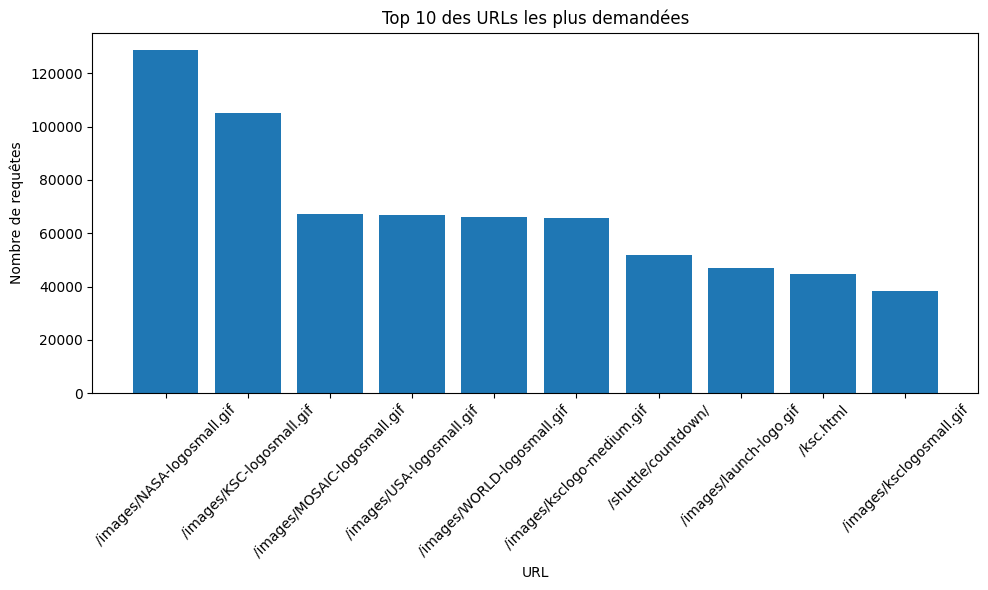


📊 Graphique enregistré dans : /content/drive/MyDrive/Projet_NASA_Logs/graphes/top_10_urls.png


In [ ]:
from elasticsearch import Elasticsearch
from elasticsearch.helpers import scan
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
import json
import os

# 1. Fichier JSON à sauvegarder
top_urls_json = os.path.join(export_dir, "top_10_urls.json")

# 2. Scan des documents pour extraire les champs nécessaires
docs = scan(es, index="nasa_logs_jul95", query={"_source": ["request"]})

# 3. Extraction des URLs depuis request
url_counts = {}
for doc in docs:
    request = doc["_source"].get("request", "")
    parts = request.split()
    if len(parts) == 3:
        url = parts[1]
        url_counts[url] = url_counts.get(url, 0) + 1

# 4. Transformation en DataFrame
df_top_urls = pd.DataFrame([
    {"url": k, "nb_requetes": v}
    for k, v in sorted(url_counts.items(), key=lambda item: item[1], reverse=True)[:10]
])

# 5. Enregistrement en JSON
with open(top_urls_json, "w") as f:
    json.dump(df_top_urls.to_dict(orient="records"), f, indent=2)

print(f"✅ Fichier JSON enregistré : {top_urls_json}\n")
print("")
# 6. Affichage du tableau
print(tabulate(df_top_urls, headers="keys", tablefmt='fancy_grid'))
print()

# 7. Création du graphique
plt.figure(figsize=(10,6))
plt.bar(df_top_urls["url"], df_top_urls["nb_requetes"])
plt.xlabel("URL")
plt.ylabel("Nombre de requêtes")
plt.title("Top 10 des URLs les plus demandées")
plt.xticks(rotation=45)
plt.tight_layout()

# 8. Sauvegarde du graphique
fig_path = os.path.join(graphe_dir, "top_10_urls.png")
plt.savefig(fig_path)
plt.show()
plt.close()
print()
print(f"📊 Graphique enregistré dans : {fig_path}")

- Les images et logos constituent la majorité des requêtes → ce qui est normal dans des logs web car chaque image compte comme une requête HTTP.

- La page /shuttle/countdown/ est très visitée → peut indiquer un événement suivi (lancement ou mission).

---

**✅ Étape suivante : Détection d'erreurs HTTP**

**🎯 Objectif :**

Identifier les requêtes ayant retourné des codes d'erreur HTTP (client ou serveur), c'est-à-dire :

- Les codes 4xx (erreurs client)

- Les codes 5xx (erreurs serveur)

🧩 Ce que nous allons faire :

- Créer une requête Elasticsearch avec un filtre sur les statuts [400 TO 599]

- Sauvegarder les résultats en JSON

- Créer un DataFrame

- Afficher les top codes d'erreurs sous forme de graphique (bar chart)

✅ Fichier JSON enregistré : /content/drive/MyDrive/Projet_NASA_Logs/exports/http_errors.json\n
╒════╤═════════════╤══════════════╕
│    │   code_http │   nb_erreurs │
╞════╪═════════════╪══════════════╡
│  0 │         404 │        12367 │
├────┼─────────────┼──────────────┤
│  1 │         500 │          115 │
├────┼─────────────┼──────────────┤
│  2 │         403 │           64 │
├────┼─────────────┼──────────────┤
│  3 │         501 │           14 │
├────┼─────────────┼──────────────┤
│  4 │         400 │            5 │
╘════╧═════════════╧══════════════╛



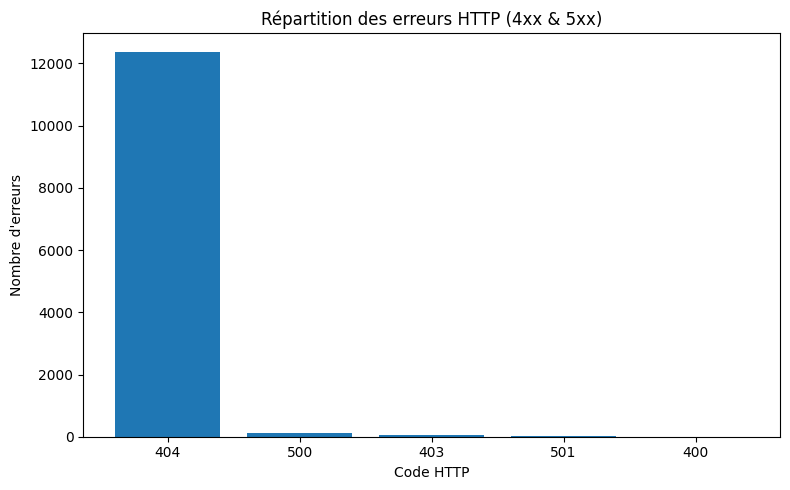


📊 Graphique enregistré dans : /content/drive/MyDrive/Projet_NASA_Logs/graphes/http_errors_distribution.png


In [ ]:
from elasticsearch import Elasticsearch
from elasticsearch.helpers import scan

# 1. Requête pour extraire les erreurs HTTP (4xx et 5xx)
error_query = {
    "size": 0,
    "aggs": {
        "http_errors": {
            "terms": {
                "field": "status",
                "size": 20
            }
        }
    },
    "query": {
        "range": {
            "status": {
                "gte": 400,
                "lte": 599
            }
        }
    }
}

# 2. Exécution de la requête
response_errors = es.search(index="nasa_logs_jul95", body=error_query)

# 3. Enregistrement JSON
errors_json_path = os.path.join(export_dir, "http_errors.json")
with open(errors_json_path, "w") as f:
    json.dump(response_errors.body, f, indent=2)

print(f"✅ Fichier JSON enregistré : {errors_json_path}\\n")

# 4. Transformation en DataFrame
try:
    buckets = response_errors["aggregations"]["http_errors"]["buckets"]
    df_errors = pd.DataFrame([{
        "code_http": b["key"],
        "nb_erreurs": b["doc_count"]
    } for b in buckets])
except Exception as e:
    print("❌ Erreur lors de la transformation :", str(e))
    df_errors = pd.DataFrame()

# 5. Affichage
if not df_errors.empty:
    print(tabulate(df_errors, headers="keys", tablefmt='fancy_grid'))

else:
    print("⚠️ Aucun résultat à afficher.")

print("")

# 6. Graphique
if not df_errors.empty:
    plt.figure(figsize=(8,5))
    plt.bar(df_errors["code_http"].astype(str), df_errors["nb_erreurs"])
    plt.xlabel("Code HTTP")
    plt.ylabel("Nombre d'erreurs")
    plt.title("Répartition des erreurs HTTP (4xx & 5xx)")
    plt.tight_layout()

    graph_path = os.path.join(graphe_dir, "http_errors_distribution.png")
    plt.savefig(graph_path)
    plt.show()
    plt.close()
    print("")
    print(f"📊 Graphique enregistré dans : {graph_path}")
else:
    print("❌ Graphique non généré : DataFrame vide.")

**🔍 Interprétation des résultats – Répartition des erreurs HTTP :**

| Code HTTP | Signification         | Nombre d'erreurs | Interprétation                                                    |
| --------- | --------------------- | ---------------- | ----------------------------------------------------------------- |
| **404**   | Not Found             | 12 367           | 🔺 Requête vers une ressource inexistante - très fréquent.        |
| **500**   | Internal Server Error | 115              | ⚠️ Erreur serveur - peut indiquer des problèmes côté application. |
| **403**   | Forbidden             | 64               | 🔐 Accès interdit - probablement des tentatives non autorisées.   |
| **501**   | Not Implemented       | 14               | ❌ Fonction non supportée - très rare.                             |
| **400**   | Bad Request           | 5                | 🔧 Requête malformée - négligeable.                               |



**📊 Observation :**

Plus de **97%** des erreurs sont des **404**, ce qui peut indiquer :

- Des URLs obsolètes

- Des liens rompus

- Des robots ou crawlers explorant des chemins invalides

---
**✅ Étape suivante : détecter les comportements anormaux **

**🎯 Objectif :**
 identifier une IP qui a généré un nombre anormalement élevé de requêtes en une seule heure.

- Agréger par IP et par heure (host + date_histogram)

- Identifier les IPs avec pics d'activité

- Générer :

      - un fichier JSON
      - un DataFrame
      - un graphique (Top 10 pics de requêtes par IP/heure)

✅ Fichier JSON enregistré : /content/drive/MyDrive/Projet_NASA_Logs/exports/ip_peaks_by_hour.json

|     | heure                      | ip                        |   nb_requetes |
|-----|----------------------------|---------------------------|---------------|
| 290 | 13/Jul/1995:06:00:00 +0000 | rush.internic.net         |           340 |
| 289 | 13/Jul/1995:05:00:00 +0000 | rush.internic.net         |           336 |
| 291 | 13/Jul/1995:07:00:00 +0000 | rush.internic.net         |           336 |
|  84 | 04/Jul/1995:16:00:00 +0000 | piweba3y.prodigy.com      |           326 |
|  53 | 03/Jul/1995:09:00:00 +0000 | dip099.pixi.com           |           322 |
|  87 | 04/Jul/1995:19:00:00 +0000 | pcrb.ccrs.emr.ca          |           310 |
|  45 | 03/Jul/1995:01:00:00 +0000 | piweba3y.prodigy.com      |           308 |
|  17 | 01/Jul/1995:21:00:00 +0000 | shuttle.gsfc.nasa.gov     |           306 |
|  71 | 04/Jul/1995:03:00:00 +0000 | ch025.chance.berkeley.edu |           302 |
|  83 | 04

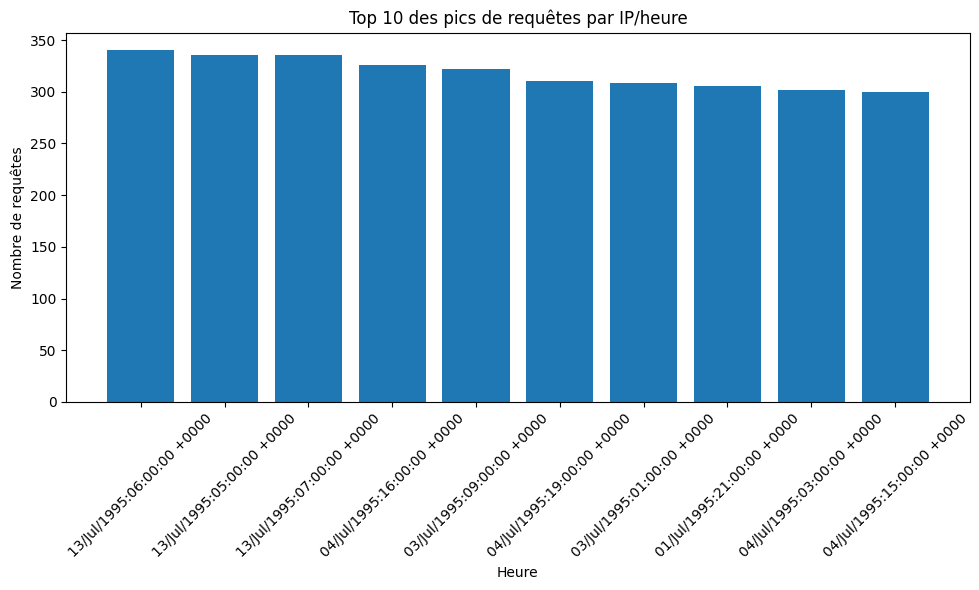

📊 Graphique enregistré dans : /content/drive/MyDrive/Projet_NASA_Logs/graphes/ip_peaks_by_hour.png


In [ ]:
from elasticsearch import Elasticsearch
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from tabulate import tabulate

# 1. Requête d’agrégation : groupement par heure et IP
query_ip_peaks = {
    "size": 0,
    "aggs": {
        "per_hour": {
            "date_histogram": {
                "field": "timestamp",
                "calendar_interval": "hour"
            },
            "aggs": {
                "top_ips": {
                    "terms": {
                        "field": "host",
                        "size": 1,
                        "order": {"_count": "desc"}
                    }
                }
            }
        }
    }
}

# 2. Requête Elasticsearch
response_peaks = es.search(index="nasa_logs_jul95", body=query_ip_peaks)

# 3. Sauvegarde JSON
json_path = os.path.join(export_dir, "ip_peaks_by_hour.json")
with open(json_path, "w") as f:
    json.dump(response_peaks.body, f, indent=2)
print(f"✅ Fichier JSON enregistré : {json_path}\n")

# 4. Extraction des données
data = []
buckets = response_peaks["aggregations"]["per_hour"]["buckets"]
for bucket in buckets:
    time = bucket["key_as_string"]
    top_ip = bucket["top_ips"]["buckets"]
    if top_ip:
        data.append({
            "heure": time,
            "ip": top_ip[0]["key"],
            "nb_requetes": top_ip[0]["doc_count"]
        })

# 5. DataFrame trié par pics
df_peaks = pd.DataFrame(data).sort_values(by="nb_requetes", ascending=False).head(10)

# 6. Affichage tabulaire
if not df_peaks.empty:
    print(tabulate(df_peaks, headers="keys", tablefmt="github"))
else:
    print("⚠️ Aucun pic détecté.")

print("\n")

# 7. Graphe
if not df_peaks.empty:
    plt.figure(figsize=(10,6))
    plt.bar(df_peaks["heure"], df_peaks["nb_requetes"])
    plt.xticks(rotation=45)
    plt.xlabel("Heure")
    plt.ylabel("Nombre de requêtes")
    plt.title("Top 10 des pics de requêtes par IP/heure")
    plt.tight_layout()

    fig_path = os.path.join(graphe_dir, "ip_peaks_by_hour.png")
    plt.savefig(fig_path)
    plt.show()
    plt.close()
    print(f"📊 Graphique enregistré dans : {fig_path}")
else:
    print("❌ Graphique non généré : DataFrame vide.")

**📈 Interprétation - Top 10 des pics de requêtes par IP/heure :**

| Heure             | IP                          | Nb Requêtes | Interprétation                                                                      |
| ----------------- | --------------------------- | ----------- | ----------------------------------------------------------------------------------- |
| 13/Jul/1995 06:00 | `rush.internic.net`         | 340         | 🔺 **Activité anormale élevée** en très peu de temps — probable robot/crawler       |
| 13/Jul/1995 05:00 | `rush.internic.net`         | 336         | 🔁 Forte persistance sur 2 heures successives — signe d’un comportement automatisé  |
| 13/Jul/1995 07:00 | `rush.internic.net`         | 336         | 🔁 Troisième pic consécutif — très caractéristique d’un **scan massif ou d’un bot** |
| 04/Jul/1995 16:00 | `piweba3y.prodigy.com`      | 326         | 🔸 IP déjà repérée dans le Top IPs — **comportement intense** également par heure   |
| 03/Jul/1995 09:00 | `dip099.pixi.com`           | 322         | 📌 Pic isolé — à surveiller                                                         |
| 04/Jul/1995 19:00 | `pcrb.ccrs.emr.ca`          | 310         | 📈 Activité anormale mais localisée                                                 |
| 03/Jul/1995 01:00 | `piweba3y.prodigy.com`      | 308         | 🔄 Deuxième pic pour la même IP — activité constante                                |
| 01/Jul/1995 21:00 | `shuttle.gsfc.nasa.gov`     | 306         | ✅ Serveur interne NASA — activité soutenue, normale                                 |
| 04/Jul/1995 03:00 | `ch025.chance.berkeley.edu` | 302         | 📌 À investiguer — si ce n’est pas un serveur, cela peut être un client ou crawler  |
| 04/Jul/1995 15:00 | `piweba3y.prodigy.com`      | 300         | 🔄 Encore une fois — activité fréquente sur plusieurs heures consécutives           |


**🔍 Conclusion :**

- rush.internic.net est clairement l'IP la plus suspecte : 3 pics successifs à plus de 330 requêtes/heure.

- piweba3y.prodigy.com montre une activité élevée et régulière — probablement un proxy ou crawler institutionnel.

Cette analyse permettrait, dans un contexte réel, de déclencher des alertes ou de mettre ces IP en observation.



---

# **📌 Extension du projet - Ajout du champ url pour l'analyse des requêtes**

**🎯 Objectif complémentaire :**

Permettre l'analyse détaillée des ressources web demandées (URLs) en extrayant proprement la cible de chaque requête HTTP contenue dans le champ request.

**🧩 Contexte :**

Le champ request dans les logs est une chaîne brute comme :
 - GET /images/NASA-logosmall.gif HTTP/1.0

Ce format empêche :

- Les agrégations par URL (car request est de type text, non agrégable)

- Les visualisations Kibana du top pages consultées

- Les filtres ou recherches exactes sur les chemins demandés.

---

🛠️ **Solution retenue :**

Ajouter dynamiquement un champ url pour chaque ligne de log, extrait de request.

---

🗂️ **Impacts sur le projet**

| Élément                     | Action requise                                         |
| --------------------------- | ------------------------------------------------------ |
| 🎯 Mapping Elasticsearch    | Mise à jour avec un champ `url: keyword`               |
| 🧮 Parsing & transformation | Ajout automatique de `url` à chaque document           |
| 🔁 Réindexation             | Nouvelle indexation dans `nasa_logs_jul95_v2`          |
| 📊 Analyses possibles       | Top 10 URLs, URLs les plus en erreur, etc.             |
| 📈 Visualisations Kibana    | Agrégations & Dashboards par `url` désormais possibles |

---

✅ **Bénéfices métier**

- Identification des ressources les plus consultées

- Détection des URLs provoquant des erreurs fréquentes

- Surveillance des accès à des contenus sensibles ou obsolètes

- Construction de dashboards Kibana orientés contenus







---

**📌 Étapes couvertes dans le script :**

- Créer un nouveau mapping avec le champ url

- Lire les fichiers .csv existants

- Ajouter dynamiquement le champ url (extrait depuis request)

- Réindexer les documents vers nasa_logs_jul95_v2

- Afficher les messages de suivi (lot par lot, erreurs, durée)



In [ ]:
import pandas as pd
import os
import json
from elasticsearch import Elasticsearch
from elasticsearch.helpers import bulk
import time

# ✅ Variables globales
EXPORTS_DIR = "/content/drive/MyDrive/Projet_NASA_Logs/exports"
NEW_INDEX = "nasa_logs_jul95_v2"
BATCH_SIZE = 30000

# ✅ Connexion Elasticsearch
es = Elasticsearch(
    ELASTIC_URL,
    api_key=API_KEY,
)

# ✅ 1. Nouveau mapping incluant le champ `url`
new_mapping = {
    "mappings": {
        "properties": {
            "host":      { "type": "keyword" },
            "ident":     { "type": "keyword" },
            "authuser":  { "type": "keyword" },
            "timestamp": { "type": "date", "format": "dd/MMM/yyyy:HH:mm:ss Z" },
            "request":   { "type": "text" },
            "status":    { "type": "integer" },
            "bytes":     { "type": "integer" },
            "url":       { "type": "keyword" }
        }
    }
}

# ✅ 2. Création de l’index (si non existant)
if not es.indices.exists(index=NEW_INDEX):
    es.indices.create(index=NEW_INDEX, body=new_mapping)
    print(f"✅ Index créé : {NEW_INDEX}")
else:
    print(f"⚠️ L’index {NEW_INDEX} existe déjà. Les documents vont y être ajoutés.")

# ✅ 3. Fonction pour extraire l’URL depuis `request`
def extract_url(req):
    try:
        parts = req.split(" ")
        return parts[1] if len(parts) > 1 else None
    except:
        return None

# ✅ 4. Réindexation des fichiers CSV
files = sorted([f for f in os.listdir(EXPORTS_DIR) if f.endswith(".csv")])
total_docs, total_errors = 0, 0

for idx, file in enumerate(files):
    csv_path = os.path.join(EXPORTS_DIR, file)
    print(f"\n📄 Traitement de : {file}")

    df = pd.read_csv(csv_path)

    # ✅ Ajout du champ `url`
    df["url"] = df["request"].apply(extract_url)

    # ✅ Transformation en documents Elasticsearch
    docs = df.to_dict(orient="records")

    # ✅ Indexation par lot
    start = time.time()
    success, failed = 0, 0

    try:
        actions = [
            { "_index": NEW_INDEX, "_source": doc }
            for doc in docs
        ]
        success, _ = bulk(es, actions)
    except Exception as e:
        print(f"❌ Erreur lors de l’indexation du fichier {file} : {e}")
        failed = len(docs)

    duration = round(time.time() - start, 2)
    total_docs += success
    total_errors += failed

    print(f"✅ Indexé : {success} docs | ⏱️ {duration}s | ❌ Échecs : {failed}")
    print()

# ✅ 5. Résumé final
print("\n📊 Résumé de la réindexation :")
print()
print(f"🔢 Total documents indexés : {total_docs}")
print(f"❌ Total erreurs : {total_errors}")
print(f"📁 Index final : {NEW_INDEX}")

✅ Index créé : nasa_logs_jul95_v2

📄 Traitement de : logs_batch_0.csv
✅ Indexé : 300000 docs | ⏱️ 244.83s | ❌ Échecs : 0


📄 Traitement de : logs_batch_1.csv
✅ Indexé : 300000 docs | ⏱️ 234.65s | ❌ Échecs : 0


📄 Traitement de : logs_batch_2.csv
✅ Indexé : 300000 docs | ⏱️ 236.55s | ❌ Échecs : 0


📄 Traitement de : logs_batch_3.csv
✅ Indexé : 300000 docs | ⏱️ 231.21s | ❌ Échecs : 0


📄 Traitement de : logs_batch_4.csv
✅ Indexé : 300000 docs | ⏱️ 230.2s | ❌ Échecs : 0


📄 Traitement de : logs_batch_5.csv
✅ Indexé : 300000 docs | ⏱️ 230.94s | ❌ Échecs : 0


📄 Traitement de : logs_batch_6.csv
✅ Indexé : 91700 docs | ⏱️ 71.07s | ❌ Échecs : 0


📊 Résumé de la réindexation :

🔢 Total documents indexés : 1891700
❌ Total erreurs : 0
📁 Index final : nasa_logs_jul95_v2


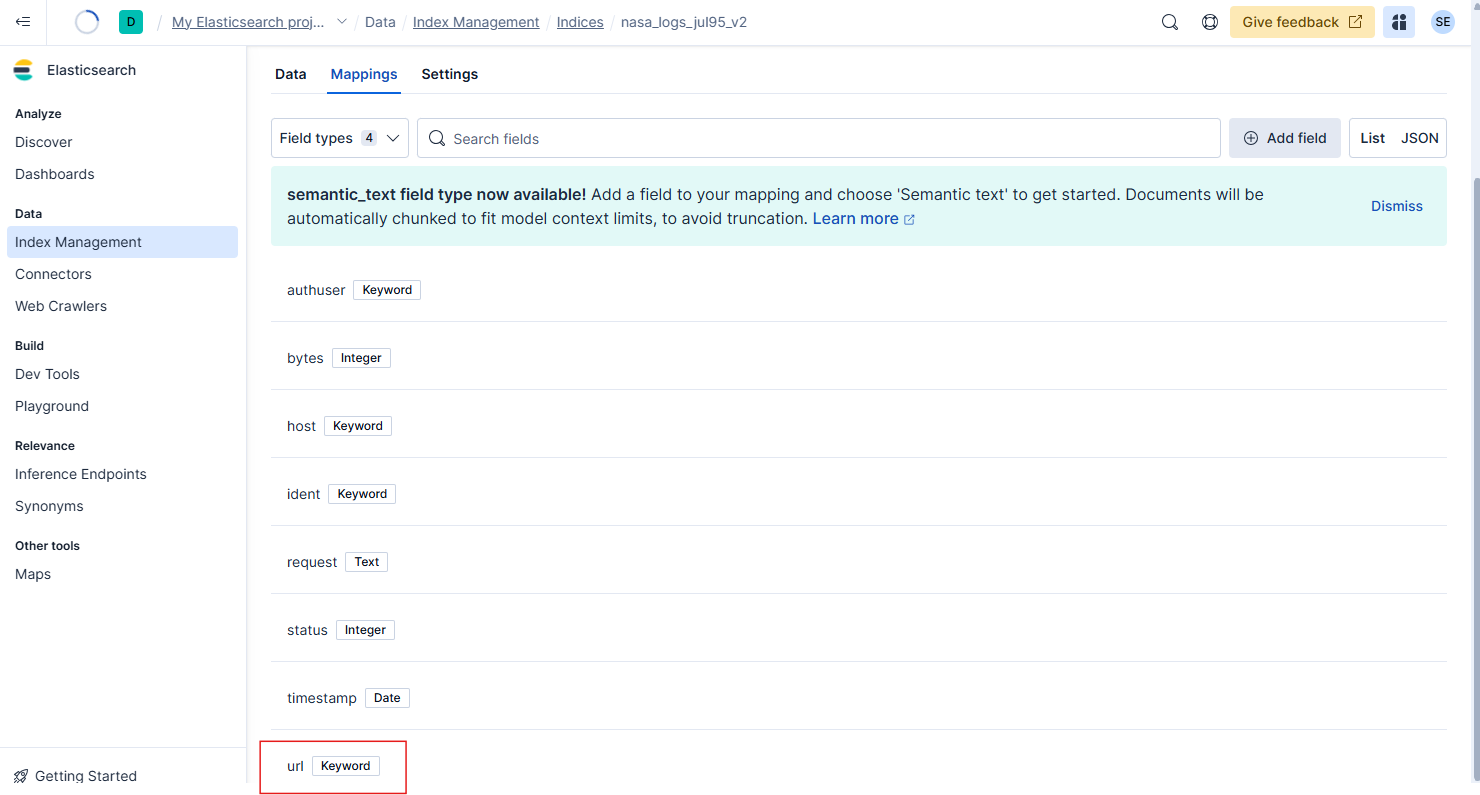

---

# **Dashboard insights clés**

| 📊 Visualisation Kibana        | Donnée utilisée                  | Type recommandé        |
| ------------------------------ | -------------------------------- | ---------------------- |
| Requêtes par heure             | `timestamp`                      | 📈 Line chart ou bar   |
| Top 10 IPs les plus actives    | `host`                           | 🧑‍💻 Horizontal bar   |
| Top 10 URLs                    | `url` (créé lors du parsing)     | 🔗 Pie chart ou bar    |
| Répartition des erreurs HTTP   | `status` avec filtre `[400–599]` | 🚨 Donut chart         |
| Requêtes d’une IP particulière | Filtre interactif sur `host`     | 📅 Timeline            |
| Volume de données transférées  | `bytes`                          | 📦 Metric or area plot |
| Anomalies (requêtes massives)  | Histogramme + split par `host`   | 📊 Bar chart stacked   |



✅ Fichier JSON enregistré : /content/drive/MyDrive/Projet_NASA_Logs/exports/top_10_urls.json

╒════╤══════════════════════════════╤═══════════════╕
│    │ url                          │   nb_requetes │
╞════╪══════════════════════════════╪═══════════════╡
│  0 │ /images/NASA-logosmall.gif   │        111388 │
├────┼──────────────────────────────┼───────────────┤
│  1 │ /images/KSC-logosmall.gif    │         89639 │
├────┼──────────────────────────────┼───────────────┤
│  2 │ /images/MOSAIC-logosmall.gif │         60468 │
├────┼──────────────────────────────┼───────────────┤
│  3 │ /images/USA-logosmall.gif    │         60014 │
├────┼──────────────────────────────┼───────────────┤
│  4 │ /images/WORLD-logosmall.gif  │         59489 │
├────┼──────────────────────────────┼───────────────┤
│  5 │ /images/ksclogo-medium.gif   │         58802 │
├────┼──────────────────────────────┼───────────────┤
│  6 │ /images/launch-logo.gif      │         40871 │
├────┼──────────────────────────────┼─────

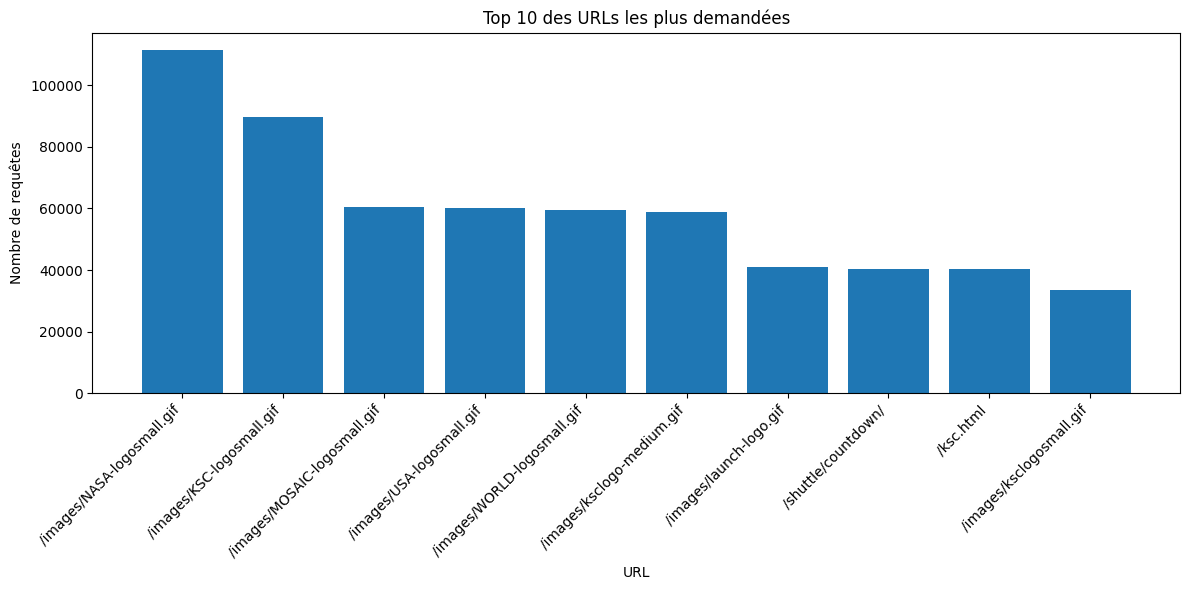


📊 Graphique enregistré dans : /content/drive/MyDrive/Projet_NASA_Logs/graphes/top_10_urls.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from tabulate import tabulate

# 🔧 Variables
graphe_dir = "/content/drive/MyDrive/Projet_NASA_Logs/graphes"
top_urls_json = os.path.join(export_dir, "top_10_urls.json")
fig_path = os.path.join(graphe_dir, "top_10_urls.png")

# 📊 Requête d’agrégation Elasticsearch
query_top_urls = {
    "size": 0,
    "aggs": {
        "top_urls": {
            "terms": {
                "field": "url",
                "size": 10
            }
        }
    }
}

# 🔍 Exécution de la requête sur le nouvel index
response = es.search(index="nasa_logs_jul95_v2", body=query_top_urls)

# 💾 Enregistrement du JSON
with open(top_urls_json, "w") as f:
    json.dump(response.body, f, indent=2)

print(f"✅ Fichier JSON enregistré : {top_urls_json}\n")

# 📄 Transformation en DataFrame
try:
    buckets = response["aggregations"]["top_urls"]["buckets"]
    df_top_urls = pd.DataFrame([{"url": b["key"], "nb_requetes": b["doc_count"]} for b in buckets])
    print(tabulate(df_top_urls, headers="keys", tablefmt="fancy_grid"))
except Exception as e:
    print(f"❌ Erreur de parsing : {e}")
    df_top_urls = pd.DataFrame()

# 📈 Graphe
if not df_top_urls.empty:
    plt.figure(figsize=(12, 6))
    plt.bar(df_top_urls["url"], df_top_urls["nb_requetes"])
    plt.xlabel("URL")
    plt.ylabel("Nombre de requêtes")
    plt.title("Top 10 des URLs les plus demandées")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig(fig_path)
    plt.show()
    print(f"\n📊 Graphique enregistré dans : {fig_path}")
else:
    print("⚠️ Aucune donnée à afficher.")



---

# **graph Lens personnalisé dans Kibana**

🔄 on va s'appuyer sur un index temporaire ou un champ pré-agrégé (via un pipeline d'ingestion ou une re-transformation des données côté Python).

✅ Objectif

Représenter le top 10 des pics de requêtes par IP/heure dans Kibana, exactement comme dans notre graphique Python.


🧩 Option :

Pré-calculer les données dans Python → Créer un nouvel index

- ✔️ Facile à mettre en œuvre
- ✔️ Full contrôle sur le format
- ✔️ Pas besoin de pipelines Kibana complexes

✅ Étapes proposées (recommandée pour débutant qui travaille sur jupyter ou colab)

🔹 1. Préparer les données (dans Python)

Créer un DataFrame qui contient :

    - timestamp_hour (arrondi à l’heure)
    - ip (ou host)
    - nb_requetes (nombre de requêtes pour cette IP à cette heure)
Et en extraire les 10 lignes les plus élevées.

🔹 2. Sauvegarder en CSV ou JSON

Format : liste de dicts comme :
- [
  {"timestamp_hour": "1995-07-13T06:00:00", "ip": "rush.internic.net", "nb_requetes": 340},
  ...
]

🔹 3. Créer un nouvel index (ex. : ip_peaks_custom) dans Kibana

On pourra :

    - soit l’importer via l’outil “Upload a file” dans Kibana
    - soit indexer via Python (es.bulk(...))

🔹 4. Créer une visualisation Lens

    - Index pattern : ip_peaks_custom
    - X axis : timestamp_hour
    - Y axis : nb_requetes
    - Breakdown (couleurs) : ip

---
✅ Étape 1 - Préparer les données agrégées (Top 10 des pics IP/heure)

**Objectif :**

Créer un DataFrame contenant le top 10 des combinaisons (host, heure) avec le plus grand nombre de requêtes.
📌 Tâches de cette étape :

    - Charger tous les fichiers logs_batch_*.csv en un seul DataFrame.
    - Convertir la colonne timestamp en datetime et l'arrondir à l'heure.
    - Grouper par (timestamp arrondi, host) et compter les requêtes.
    - Trier et garder les 10 plus gros pics.

In [ ]:
import pandas as pd
import glob

# 1. Chemin vers les fichiers logs
log_files = sorted(glob.glob("/content/drive/MyDrive/Projet_NASA_Logs/exports/logs_batch_*.csv"))

# 2. Chargement et concaténation
df_all = pd.concat([pd.read_csv(f) for f in log_files], ignore_index=True)

# 3. Conversion du timestamp en datetime (attention au fuseau)
df_all["timestamp"] = pd.to_datetime(df_all["timestamp"], format="%d/%b/%Y:%H:%M:%S %z", errors="coerce")

# 4. Ajout d'une colonne "heure arrondie"
df_all["heure"] = df_all["timestamp"].dt.floor("H")

# 5. Groupe par (heure, host)
df_grouped = df_all.groupby(["heure", "host"]).size().reset_index(name="nb_requetes")

# 6. Top 10 pics
df_top_pics = df_grouped.sort_values(by="nb_requetes", ascending=False).head(10)

# 7. Affichage
from tabulate import tabulate
print(tabulate(df_top_pics, headers="keys", tablefmt="github"))

<ipython-input-22-42a6b5a8456b>:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_all["heure"] = df_all["timestamp"].dt.floor("H")


|        | heure                     | host                       |   nb_requetes |
|--------|---------------------------|----------------------------|---------------|
|  68590 | 1995-07-13 02:00:00-04:00 | rush.internic.net          |           340 |
|  68779 | 1995-07-13 03:00:00-04:00 | rush.internic.net          |           336 |
|  68359 | 1995-07-13 01:00:00-04:00 | rush.internic.net          |           336 |
|  71515 | 1995-07-13 09:00:00-04:00 | vagrant.vf.mmc.com         |           276 |
| 117463 | 1995-07-20 11:00:00-04:00 | kss2nn.nn.mobitel.telia.se |           265 |
|  28918 | 1995-07-06 20:00:00-04:00 | spidey.cor.epa.gov         |           250 |
| 124068 | 1995-07-21 11:00:00-04:00 | siltb10.orl.mmc.com        |           240 |
| 123351 | 1995-07-21 09:00:00-04:00 | vagrant.vf.mmc.com         |           240 |
| 157903 | 1995-07-27 20:00:00-04:00 | mega218.megamed.com        |           235 |
|  69754 | 1995-07-13 07:00:00-04:00 | theopolis.orl.mmc.com      |         

---
🔜 Étape 2 — Sauvegarde du top dans un fichier temporaire

- Sauvegarder ce top 10 dans un CSV et JSON dans exports/ ?

- créer un index Elasticsearch temporaire (ip_hour_peaks) avec ces données pour les visualiser dans Kibana ?

Notons que datetime n'est pas sérialisable directement en JSON, donc on doit le convertir les valeurs avec .isoformat() avant l'export.

In [ ]:
#Création du fichier JSON
#Traçabilité : on aura un fichier clair à archiver dans le dossier exports/ de ton projet.
#Réutilisabilité : on peut réutiliser ce fichier pour réindexer plus tard, tester sur d'autres clusters, ou documenter.
#Sécurité : en cas de problème d’indexation dans Elasticsearch, on peut relancer sans refaire tout le calcul.

import os
import json

# 1. Définir le nom des fichiers
csv_path = os.path.join(export_dir, "ip_peaks_top10.csv")
json_path = os.path.join(export_dir, "ip_peaks_top10.json")

# 2. Sauvegarde en CSV
df_top_pics.to_csv(csv_path, index=False)
print(f"✅ Fichier CSV sauvegardé : {csv_path}")

# 3. Sauvegarde en JSON
records = df_top_pics.to_dict(orient="records")
# Convertir le TimeStamp en String avant de l'inserer dans JSON
for record in records:
    record['heure'] = record['heure'].isoformat()

with open(json_path, "w") as f:
    json.dump(records, f, indent=2)

print(f"✅ Fichier JSON sauvegardé : {json_path}")

✅ Fichier CSV sauvegardé : /content/drive/MyDrive/Projet_NASA_Logs/exports/ip_peaks_top10.csv
✅ Fichier JSON sauvegardé : /content/drive/MyDrive/Projet_NASA_Logs/exports/ip_peaks_top10.json


---
🔜 Étape 3 — Indexation dans Elasticsearch (ip_hour_peaks)

Nous allons maintenant :

- Créer un nouvel index nommé ip_hour_peaks,
- Définir un mapping personnalisé adapté (avec heure en date, host en keyword, nb_requetes en integer),
- Charger les données depuis le fichier JSON,
- Les indexer par batch sécurisé (avec suivi RAM/CPU/erreurs comme précédemment).

---

🔁 Deux façons d'indexer ces données :
🟢 1. Méthode script Python (celle qu'on suit maintenant vu que nous travaillons sur colab)

  - ✔️ Automatisable

  - ✔️ Réutilisable dans d'autres projets

  - ✔️ Intégrable dans un pipeline complet

🟣 2. Méthode via l'interface Kibana > Dev Tools ou Data Visualizer

  Dans Kibana :

      - Aller dans : Management > Stack Management > Data > Index Management
      - Ou Upload a file (interface “Data View”)

 On peut importer le CSV directement dans Kibana

        Kibana  propose de créer un index pattern et un mapping automatiquement.

In [ ]:
from elasticsearch.helpers import bulk
import time
import psutil
import os

# 1. Configuration de l'index
index_name = "ip_hour_peaks"

# 2. Mapping adapté
mapping_body = {
    "mappings": {
        "properties": {
            "heure": {"type": "date"},
            "host": {"type": "keyword"},
            "nb_requetes": {"type": "integer"}
        }
    }
}

# 3. Création de l'index (si non existant)
if not es.indices.exists(index=index_name):
    es.indices.create(index=index_name, body=mapping_body)
    print(f"✅ Index créé : {index_name}")
else:
    print(f"ℹ️ Index déjà existant : {index_name}")

# 4. Charger les données JSON
json_path = os.path.join(export_dir, "ip_peaks_top10.json")

with open(json_path, "r") as f:
    data_to_index = json.load(f)

# 5. Fonction d'action
def gen_actions(data):
    for doc in data:
        yield {
            "_index": index_name,
            "_source": doc
        }

# 6. Indexation en batch
start = time.time()
proc = psutil.Process(os.getpid())

try:
    success, _ = bulk(es, gen_actions(data_to_index))
    print(f"✅ Documents indexés : {success}")
except Exception as e:
    print("❌ Erreur d'indexation :", str(e))

end = time.time()
duration = round(end - start, 2)
ram = round(proc.memory_info().rss / 1024 / 1024, 2)
cpu = psutil.cpu_percent(interval=0.1)

print(f"\n⏱️ Temps total : {duration}s | 💾 RAM : {ram}MB | ⚙️ CPU : {cpu}%")

ℹ️ Index déjà existant : ip_hour_peaks
✅ Documents indexés : 10

⏱️ Temps total : 0.28s | 💾 RAM : 584.89MB | ⚙️ CPU : 20.0%




---

# **Visualisation Lens dans Kibana**

**✅ Objectif**

Créer une visualisation claire du Top 10 des pics de requêtes par IP/heure dans Kibana avec l'index ip_hour_peaks.

🧭 Étapes dans Kibana (Interface)

🔹 1. Aller dans Analytics > Visualize Library

    - Cliquer sur "Create visualization"
    - Choisir Lens (Visual Builder moderne)

🔹 2. Sélectionner l'index ip_hour_peaks

    Si l’index n’apparaît pas :

        - Aller dans "Stack Management" > "Data Views"
        - Créer un nouveau Data View appelé ip_hour_peaks
        - Champ de temps : heure

🔹 3. Construire la visualisation dans Lens

| Zone                         | Action à faire                                  |
| ---------------------------- | ----------------------------------------------- |
| 📊 **Y axis (vertical)**     | `nb_requetes` (aggregation: **sum** ou **max**) |
| 🕒 **X axis (horizontal)**   | `heure`                                         |
| 🎨 **Split series (colors)** | `host`                                          |

Type de graphique recommandé :

- Bar chart ou Line chart

Cocher l'option “Top values” pour n'afficher que les IPs les plus actives.

📌 Bonus

    - Active le filtre temporel dynamique (en haut à droite) pour naviguer dans la période (ex. : 01/Jul/1995 à 14/Jul/1995)
    - Personnalise le titre, les labels et la légende


---
**Erreur 🇰**

Le message d'erreur This field does not work with the selected function signifie que le champ heure est toujours considéré comme un champ de type date, non agrégable sous forme de "Top valeurs" car ce n’est pas un champ keyword ou text.

🎯 Explication

    - Top values fonctionne uniquement avec des champs de type keyword, text, ou numeric discret (comme status, host, etc.).
    - Le champ heure est un champ date, même s'il est "arrondi" à l'heure près.
    - Les dates ne peuvent pas être agrégées en "top valeurs", uniquement en histogramme de dates.

✅ Solution simple (recommandée)

Nous allons créer un champ supplémentaire heure_str dans le JSON envoyé à Elasticsearch, contenant l'heure convertie en chaîne de caractères (string) pour permettre l'agrégation.

Script pour :

    - Ajouter heure_str dans le JSON.
    - Réindexer dans un nouvel index ou dans le même.
    - Créer la visualisation proprement dans Kibana.

In [ ]:
# 1. Ajouter un champ heure_str (heure sous forme de texte)
df_top_pics["heure_str"] = df_top_pics["heure"].dt.strftime("%Y-%m-%d %H:%M:%S")

In [ ]:
# 2. Sauvegarde JSON avec heure_str
#records = df_top_pics.to_dict(orient="records")
for record in records:
    record['heure'] = record['heure'].isoformat() if isinstance(record['heure'], pd.Timestamp) else record['heure']

with open(json_path, "w") as f:
    json.dump(records, f, indent=2)

print(f"✅ Fichier JSON sauvegardé avec 'heure_str' : {json_path}")

✅ Fichier JSON sauvegardé avec 'heure_str' : /content/drive/MyDrive/Projet_NASA_Logs/exports/ip_peaks_top10.json


In [ ]:
from elasticsearch.helpers import bulk
import time
import psutil
import os
import json

# 1. Nom de l'index
index_name = "ip_hour_peaks"

# 2. Mapping avec le champ heure_str
mapping_body = {
    "mappings": {
        "properties": {
            "heure":       {"type": "date"},
            "heure_str":   {"type": "keyword"},  # Ajout pour Kibana Lens
            "host":        {"type": "keyword"},
            "nb_requetes": {"type": "integer"}
        }
    }
}

# 3. Supprimer l’index s’il existe
if es.indices.exists(index=index_name):
    es.indices.delete(index=index_name)
    print(f"🗑️ Ancien index supprimé : {index_name}")

# 4. Créer le nouvel index avec mapping
es.indices.create(index=index_name, body=mapping_body)
print(f"✅ Nouvel index créé : {index_name}")

# 5. Charger les données JSON avec heure_str
json_path = os.path.join(export_dir, "ip_peaks_top10.json")
with open(json_path, "r") as f:
    data_to_index = json.load(f)

# Vérifier présence de "heure_str"
if not all("heure_str" in d for d in data_to_index):
    raise ValueError("❌ Le champ 'heure_str' est manquant dans les documents.")

# 6. Préparer les actions à indexer
def gen_actions(data):
    for doc in data:
        yield {
            "_index": index_name,
            "_source": doc
        }

# 7. Indexation avec suivi
start = time.time()
proc = psutil.Process(os.getpid())

try:
    success, _ = bulk(es, gen_actions(data_to_index))
    print(f"✅ Documents indexés : {success}")
except Exception as e:
    print("❌ Erreur d'indexation :", str(e))

end = time.time()
duration = round(end - start, 2)
ram = round(proc.memory_info().rss / 1024 / 1024, 2)
cpu = psutil.cpu_percent(interval=0.1)

print(f"\n⏱️ Temps total : {duration}s | 💾 RAM : {ram}MB | ⚙️ CPU : {cpu}%")

🗑️ Ancien index supprimé : ip_hour_peaks
✅ Nouvel index créé : ip_hour_peaks
✅ Documents indexés : 10

⏱️ Temps total : 0.29s | 💾 RAM : 584.89MB | ⚙️ CPU : 0.0%


Dasboard Final

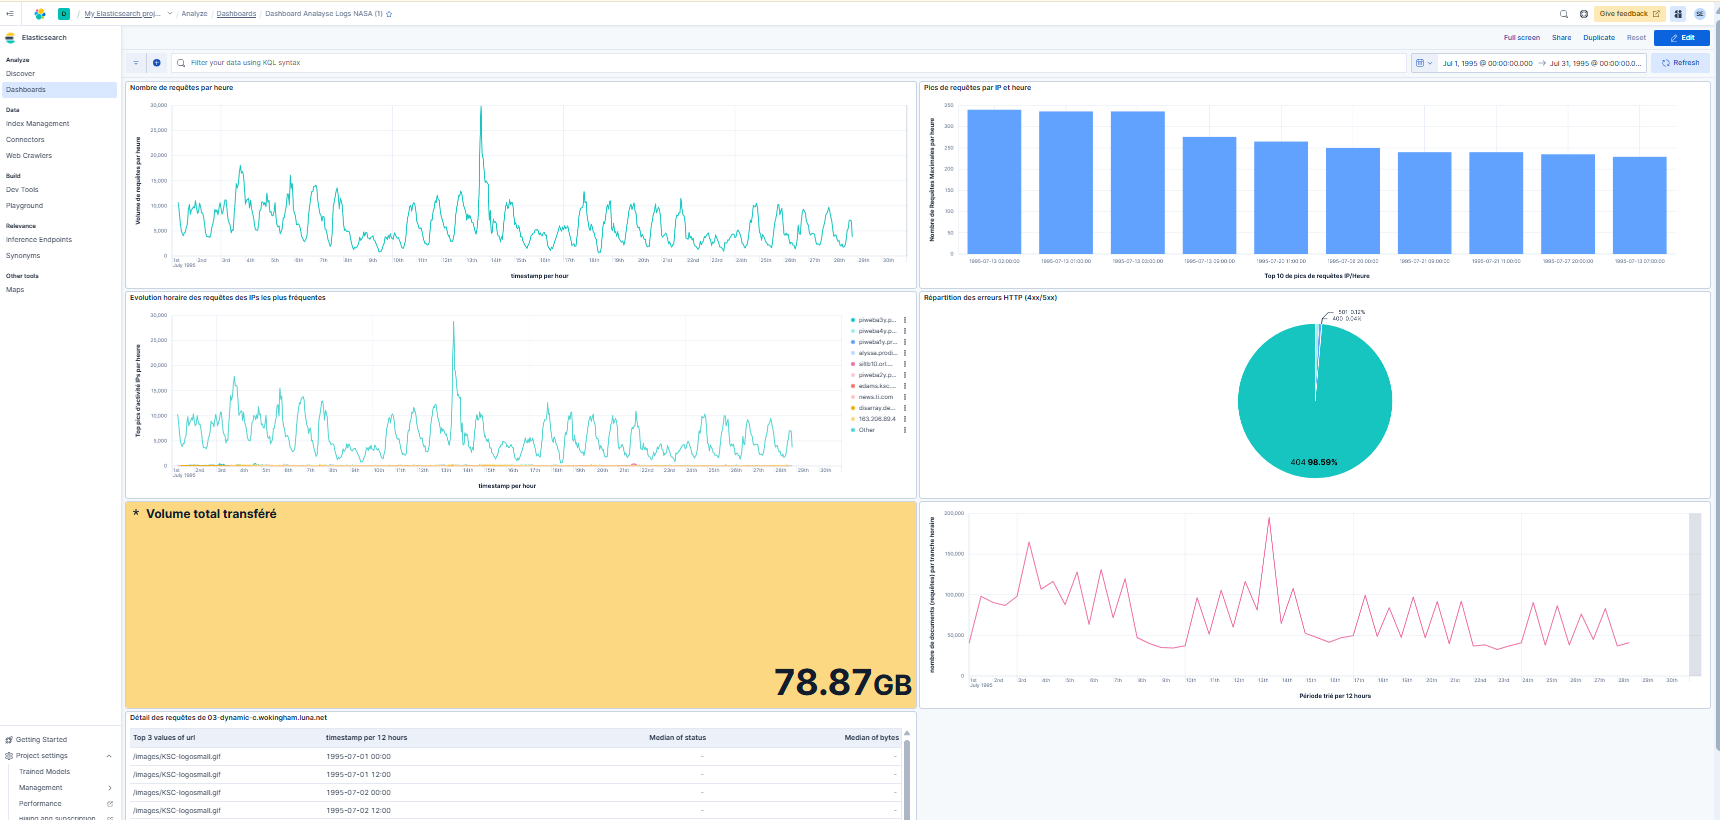

lien d'accès au dashboard sur elasticsearch:
https://my-elasticsearch-project-d88606.kb.us-east-1.aws.elastic.cloud/app/r/s/05g1e

# **Modelisation**

**🎯 Objectif pédagogique :**
Apprendre à créer, entraîner et utiliser un modèle de machine learning directement dans Elasticsearch (via la UI ou l'API), sans passer par des outils externes.

✅ Étapes proposées (progressives et pédagogiques)

| Étape                                                                  | But                                                                                    | Ce que tu vas apprendre                  |
| ---------------------------------------------------------------------- | -------------------------------------------------------------------------------------- | ---------------------------------------- |
| **1. Préparer les données d'entraînement dans un index**               | Fournir les bonnes colonnes (features) pour l'apprentissage                            | Feature engineering dans Elasticsearch   |
| **2. Créer un modèle supervisé via l'interface Trained Models** | Exemple : prédire le volume de requêtes ou les erreurs HTTP à partir de l'heure/IP/URL | Utilisation du menu *Trained Models*     |
| **3. L'entraîner directement dans Elasticsearch**                      | Entraînement automatique basé sur un pipeline d'apprentissage supervisé                | Apprentissage via *data frame analytics* |
| **4. Déployer et utiliser ce modèle sur de nouveaux logs**             | Voir les prédictions générées dans les dashboards ou via un pipeline d'ingestion       | Intégration avec le workflow existant    |


---

✅ Ce que permet le menu "Trained Models" d'Elasticsearch

Télécharger et déployer des modèles NLP préentraînés (comme ELSER, E5) pour :

- Recherche sémantique,

- Expansion de texte,

- Détection de langue,

- Embeddings vectoriels, etc.

- Importer tes propres modèles ML (entraînés ailleurs, comme avec Scikit-learn, XGBoost, PyTorch...) via le client Python eland.

- Déployer et tester ces modèles directement dans Elasticsearch, sans changer d’environnement.

---


**🎯 Objectifs métiers concrets**

| Objectif                        | Description                                                                                                       |
| ------------------------------- | ----------------------------------------------------------------------------------------------------------------- |
| **Détection d'anomalies**       | Identifier automatiquement les comportements inhabituels (pics de requêtes, erreurs massives, attaques DoS, etc.) |
| **Prévention des pannes**       | Anticiper une surcharge de trafic ou des erreurs critiques avant qu'elles n'affectent les utilisateurs            |
| **Alerting intelligent**        | Générer des alertes intelligentes basées sur des patterns anormaux et non sur des seuils fixes                    |
| **Optimisation des ressources** | Adapter dynamiquement l'infrastructure en fonction de la charge prédite                                           |
| **Sécurité**                    | Repérer les adresses IP suspectes ou bots malveillants à partir de comportements atypiques                        |

---

**📦 Exemples de modèles déployables**

| Modèle                               | Type                      | Cas d'usage                                                                      |
| ------------------------------------ | ------------------------- | -------------------------------------------------------------------------------- |
| **Isolation Forest / One-Class SVM** | Non supervisé             | Détection d'anomalies sur le volume de requêtes ou les codes HTTP                |
| **LSTM / RNN**                       | Deep learning (supervisé) | Prévision du trafic horaire sur les jours suivants                               |
| **Clustering (KMeans)**              | Non supervisé             | Regroupement de comportements d'IP pour identifier des usages normaux / suspects |
| **Random Forest / XGBoost**          | Supervisé                 | Prédire la probabilité d'erreurs (4xx/5xx) en fonction des requêtes              |

---

🔧 **Outils d'intégration possibles**

- Python / scikit-learn pour prototyper

- Elastic ML (si nous avons X-Pack) pour automatiser la détection d'anomalies en temps réel

- Docker + Flask API pour exposer un modèle prédictif en production

- ElasticSearch ingest pipeline pour enrichir les logs avec des prédictions avant indexation






---

**🧠 PLAN DE MODÉLISATION : Détection de comportements suspects dans les logs NASA**

**🎯 Objectif :**

🔐 Objectif du modèle :

Détecter automatiquement les comportements suspects ou menaçants dans les logs HTTP à partir de :

- Un nombre anormal de codes 4xx / 5xx

- Des IPs faisant beaucoup de requêtes en peu de temps

- Des patterns d'URL typiques de scanners ou de bots

Classer chaque IP/heure comme :

- 1 : comportement suspect (potentielle menace : bot, scan, attaque)
- 0 : comportement normal

# **1. Préparation des données**

Depuis les logs enrichis (déjà parsés dans Elasticsearch), on extrait :

- host (IP)
- timestamp
- status (code HTTP)
- url
- bytes

On regroupe par IP + heure pour calculer :

Champs cibles featurs labes

| Champ          | Description                                                  |
| -------------- | ------------------------------------------------------------ |
| `host`         | Nom d'hôte / IP                                              |
| `heure`        | Date tronquée à l'heure                                      |
| `nb_total`     | Nombre total de requêtes                                     |
| `nb_erreurs`   | Nombre de requêtes ayant un code 4xx ou 5xx                  |
| `prop_erreurs` | Proportion de requêtes en erreur (`nb_erreurs` / `nb_total`) |
| `urls_uniques` | Nombre d'URLs distinctes appelées par IP/heure                            |
| `bytes_total`  | Total des bytes ou  Somme des données transférés                                   |
| `label`        | 1 si anomalie détectée ou si IP est suspecte (règle simple), sinon 0               |





Pour des raison de professionalisme, nous allons créer un nouvel index nommé logs_model_training, pour plusieurs raisons stratégiques :

| Argument                                                | Détail                                                                                                          |
| ------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------- |
| 🎯 **Spécifique à l'entraînement**                      | On n'as que les colonnes utiles au ML (features + label) sans bruit.                                            |
| ⚙️ **Prétraité et propre**                              | On peut pré-calculer les agrégats (`nb_requetes`, `prop_erreurs`, etc.) et éviter les calculs à chaque requête. |
| 🧪 **Isolé et versionné**                               | On peut réentraîner facilement, comparer plusieurs modèles avec le même jeu de données.                         |
| 🚀 **Compatible avec ELAND / PyTorch / ElandModel API** | Ce format propre est directement compatible avec les imports Elastic.                                           |
| 🔐 **Pas de risque pour l'index principal**             | On garde `nasa_logs_jul95_v2` intact pour d'autres visualisations ou recherches.                               |


In [ ]:
EXPORTS_DIR = "/content/drive/MyDrive/Projet_NASA_Logs/exports"

In [ ]:
#1 - Construction du Dataframe
from elasticsearch import Elasticsearch
from elasticsearch.helpers import scan
import pandas as pd
import datetime
import os

# Connexion au cluster (reprend tes variables déjà définies)
es = Elasticsearch(ELASTIC_URL, api_key=API_KEY)

# 1. Définir la requête pour récupérer tous les documents utiles
query = {
    "query": {
        "match_all": {}
    }
}

# 2. Scan pour récupérer tous les documents de l'index
docs = scan(
    client=es,
    index="nasa_logs_jul95_v2",
    query=query,
    size=1000,
    preserve_order=True
)

# 3. Convertir en DataFrame
data = []
for doc in docs:
    source = doc["_source"]
    data.append({
        "host": source["host"],
        "timestamp": source["timestamp"],
        "status": source["status"],
        "bytes": source["bytes"],
        "url": source.get("url", None)  # sécurité si 'url' absent
    })

df = pd.DataFrame(data)

# 4. Nettoyage et transformation
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%d/%b/%Y:%H:%M:%S %z", errors="coerce")
df.dropna(subset=["timestamp"], inplace=True)

# 5. Ajout de la colonne 'heure' tronquée
df["heure"] = df["timestamp"].dt.floor("h")

# 6. Marquer les erreurs HTTP
df["is_error"] = df["status"].apply(lambda x: 1 if 400 <= x < 600 else 0)

# 7. Grouper les données par IP et heure
df_grouped = df.groupby(["host", "heure"]).agg(
    nb_total=("status", "count"),
    nb_erreurs=("is_error", "sum"),
    prop_erreurs=("is_error", "mean"),
    urls_uniques=("url", "nunique"),
    bytes_total=("bytes", "sum")
).reset_index()

# 8. Label binaire (anomalie = beaucoup d’erreurs ou pics de requêtes)
df_grouped["label"] = df_grouped.apply(lambda row: 1 if row["nb_erreurs"] > 100 or row["prop_erreurs"] > 0.5 else 0, axis=1)

# 9. Affichage d’un échantillon
print(df_grouped.head())

# 10. Sauvegarde locale + Drive
export_path = "/content/drive/MyDrive/Projet_NASA_Logs/exports/logs_model_training.csv"
df_grouped.to_csv(export_path, index=False)
print(f"✅ Données sauvegardées : {export_path}")

             host                     heure  nb_total  nb_erreurs  \
0     ***.novo.dk 1995-07-11 08:00:00-04:00        16           0   
1  007.thegap.com 1995-07-06 17:00:00-04:00        15           0   
2  007.thegap.com 1995-07-06 19:00:00-04:00        15           0   
3  007.thegap.com 1995-07-09 20:00:00-04:00         2           0   
4  007.thegap.com 1995-07-09 21:00:00-04:00         9           0   

   prop_erreurs  urls_uniques  bytes_total  label  
0           0.0            14        84943      0  
1           0.0            14       431660      0  
2           0.0            15       360188      0  
3           0.0             2          957      0  
4           0.0             9        48781      0  
✅ Données sauvegardées : /content/drive/MyDrive/Projet_NASA_Logs/exports/logs_model_training.csv


---
# **⚙️ Étape 2 - Feature engineering**

- Standardisation ou normalisation des variables si nécessaire.

- Optionnel : transformation logarithmique si skewness.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew
from tabulate import tabulate
import os

# 📁 Charger les données
csv_path = "/content/drive/MyDrive/Projet_NASA_Logs/exports/logs_model_training.csv"
df = pd.read_csv(csv_path)

print("✅ Données chargées :")
print(tabulate(df.head(), headers="keys", tablefmt="fancy_grid"))

# 🎯 Sélection des variables à transformer
features_to_scale = ["nb_total", "prop_erreurs", "urls_uniques", "bytes_total"]

# 🔍 Analyse de la skewness
print("\n📊 Skewness des variables :")
for col in features_to_scale:
    skew_val = skew(df[col])
    print(f"  - {col} : {skew_val:.2f}")

# ⚙️ Transformation logarithmique pour celles très asymétriques (skew > 1)
for col in features_to_scale:
    if skew(df[col]) > 1:
        df[col] = np.log1p(df[col])  # log(1+x) pour éviter log(0)
        print(f"🔄 Log transformée appliquée sur : {col}")

# 🧪 Standardisation avec MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])
print("\n✅ Variables standardisées (MinMaxScaler)")

# 📁 Sauvegarde du fichier final prêt à être indexé
ready_path = "/content/drive/MyDrive/Projet_NASA_Logs/exports/logs_model_training_ready.csv"
df_scaled.to_csv(ready_path, index=False)
print(f"\n✅ Fichier sauvegardé : {ready_path}")

✅ Données chargées :
╒════╤════════════════╤═══════════════════════════╤════════════╤══════════════╤════════════════╤════════════════╤═══════════════╤═════════╕
│    │ host           │ heure                     │   nb_total │   nb_erreurs │   prop_erreurs │   urls_uniques │   bytes_total │   label │
╞════╪════════════════╪═══════════════════════════╪════════════╪══════════════╪════════════════╪════════════════╪═══════════════╪═════════╡
│  0 │ ***.novo.dk    │ 1995-07-11 08:00:00-04:00 │         16 │            0 │              0 │             14 │         84943 │       0 │
├────┼────────────────┼───────────────────────────┼────────────┼──────────────┼────────────────┼────────────────┼───────────────┼─────────┤
│  1 │ 007.thegap.com │ 1995-07-06 17:00:00-04:00 │         15 │            0 │              0 │             14 │        431660 │       0 │
├────┼────────────────┼───────────────────────────┼────────────┼──────────────┼────────────────┼────────────────┼───────────────┼─────────┤

| Étape                | Détail                                                                           |
| -------------------- | -------------------------------------------------------------------------------- |
| 📄 Fichier d'entrée  | `logs_model_training.csv`                                                        |
| 🧮 Skewness détectée | Forte asymétrie sur toutes les variables numériques                              |
| 🔁 Transformations   | `log1p()` appliqué sur `nb_total`, `prop_erreurs`, `urls_uniques`, `bytes_total` |
| 🔧 Standardisation   | MinMaxScaler sur les 4 variables après log transformation                        |
| 💾 Fichier généré    | `logs_model_training_ready.csv`                                                  |

Indaxtion du dataset logs_model_training_ready.csv dans elasticsearch

In [ ]:
from elasticsearch.helpers import bulk
import pandas as pd
import json
import time
import psutil
import os

# 📁 Chemin du fichier prêt pour l’entraînement
csv_path = "/content/drive/MyDrive/Projet_NASA_Logs/exports/logs_model_training_ready.csv"
index_name = "logs_model_training"

# 🔁 Supprimer l’index s’il existe déjà
if es.indices.exists(index=index_name):
    es.indices.delete(index=index_name)
    print(f"🗑️ Index supprimé : {index_name}")

# 🧱 Définir le mapping pour l'entraînement
mapping = {
    "mappings": {
        "properties": {
            "host": {"type": "keyword"},
            "heure": {"type": "date"},
            "nb_total": {"type": "float"},
            "prop_erreurs": {"type": "float"},
            "urls_uniques": {"type": "float"},
            "bytes_total": {"type": "float"},
            "label": {"type": "integer"}
        }
    }
}

# 🧩 Créer le nouvel index
es.indices.create(index=index_name, body=mapping)
print(f"✅ Nouvel index créé : {index_name}")

# 📖 Charger les données
df = pd.read_csv(csv_path, parse_dates=["heure"])
print(f"📄 Fichier chargé : {df.shape[0]} lignes")

# 🔄 Convertir en documents Elasticsearch
docs = df.to_dict(orient="records")

# 🏗️ Fonction de génération d’actions
def gen_actions(data):
    for doc in data:
        yield {
            "_index": index_name,
            "_source": doc
        }

# ⚙️ Indexation avec suivi
start = time.time()
proc = psutil.Process(os.getpid())

success, _ = bulk(es, gen_actions(docs))

end = time.time()
duration = round(end - start, 2)
ram = round(proc.memory_info().rss / 1024 / 1024, 2)
cpu = psutil.cpu_percent(interval=0.1)

# ✅ Résumé
print(f"\n✅ Documents indexés : {success}")
print(f"⏱️ Temps total : {duration}s | 💾 RAM : {ram}MB | ⚙️ CPU : {cpu}%")

✅ Nouvel index créé : logs_model_training
📄 Fichier chargé : 182653 lignes

✅ Documents indexés : 182653
⏱️ Temps total : 180.8s | 💾 RAM : 1493.16MB | ⚙️ CPU : 5.0%


**📊 Différence entre nasa_logs_jul95_v2 et logs_model_training**

| Élément                        | `nasa_logs_jul95_v2`               | `logs_model_training`                          |
| ------------------------------ | ---------------------------------- | ---------------------------------------------- |
| 📦 Volume initial              | 1 891 700 lignes                   | 182 653 lignes                                 |
| 🔁 Agrégation par host + heure | ❌ (chaque ligne = 1 log brut)      | ✅ (agrégation de toutes les requêtes/heure/IP) |
| 📐 Colonnes                    | host, request, status, bytes…      | host, heure, nb\_total, erreurs, label…        |
| 🧠 Usage                       | Visualisation, filtrage, dashboard | Entraînement ML sur comportements IP           |

---


**🧠 Raisons du volume plus petit dans logs_model_training :**

- Agrégation : chaque ligne du nouveau fichier représente un résumé statistique des logs par IP et par heure → beaucoup moins de lignes.

- Colonnes réduites : uniquement les champs nécessaires au modèle (quantitatifs et label).

- Compression des données : moins de texte libre = meilleure compression = moins d'espace disque.

# **🤖 Étape 3 - Entraînement de 3 modèles**

Utilise un modèle de classification :

- LogisticRegression, RandomForestClassifier ou XGBoostClassifier
- Fichier : logs_model_training_ready.csv
- Features : log_nb_total, prop_erreurs, urls_uniques, log_bytes_total
- **Target : label  (0 = normal, 1 = anomalie)**

---

| Modèle               | Type     | Remarques                         |
| -------------------- | -------- | --------------------------------- |
| `LogisticRegression` | Linéaire | Baseline, rapide, interprétable   |
| `RandomForest`       | Arbres   | Bon pour petits datasets, robuste |
| `XGBoostClassifier`  | Boosting | Très performant pour détection    |

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib

# 1. Chargement des données préparées
df = pd.read_csv("/content/drive/MyDrive/Projet_NASA_Logs/exports/logs_model_training_ready.csv")

# 2. Définition des features et de la cible
X = df[["nb_total", "prop_erreurs", "urls_uniques", "bytes_total"]]
y = df["label"]

# 3. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 4. Initialisation des modèles
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

# 5. Entraînement et sauvegarde
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    joblib.dump(model, f"/content/drive/MyDrive/Projet_NASA_Logs/models/{name.replace(' ', '_').lower()}.joblib")
    print(f"✅ Modèle entraîné et sauvegardé : {name}")

# Sauvegarde des données de test pour réutilisation
X_test.to_csv("/content/drive/MyDrive/Projet_NASA_Logs/exports/X_test.csv", index=False)
y_test.to_csv("/content/drive/MyDrive/Projet_NASA_Logs/exports/y_test.csv", index=False)

✅ Modèle entraîné et sauvegardé : Logistic Regression
✅ Modèle entraîné et sauvegardé : Random Forest


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:20:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Modèle entraîné et sauvegardé : XGBoost


# **📊 Étape 4 - Évaluation comparative**
Nous utilisons les métriques suivantes :

| Métrique             | Utilité                                      |
| -------------------- | -------------------------------------------- |
| Accuracy             | Taux de bonnes prédictions                   |
| Precision            | % de vrais positifs sur les positifs prédits |
| Recall               | Détection des menaces                        |
| F1-score             | Équilibre entre recall et precision          |
| AUC ROC              | Qualité du score de classification           |
| Matrice de confusion | Visualisation des erreurs                    |




📊 Résultats comparatifs :

╒════╤═════════════════════╤════════════╤════════════════════════╤═════════════════════╤═══════════════════════╕
│    │ Modèle              │   Accuracy │   Precision (anomalie) │   Recall (anomalie) │   F1-score (anomalie) │
╞════╪═════════════════════╪════════════╪════════════════════════╪═════════════════════╪═══════════════════════╡
│  0 │ Logistic Regression │     0.9999 │                      1 │              0.9741 │                0.9869 │
├────┼─────────────────────┼────────────┼────────────────────────┼─────────────────────┼───────────────────────┤
│  1 │ Random Forest       │     1      │                      1 │              1      │                1      │
├────┼─────────────────────┼────────────┼────────────────────────┼─────────────────────┼───────────────────────┤
│  2 │ XGBoost             │     1      │                      1 │              0.999  │                0.9995 │
╘════╧═════════════════════╧════════════╧════════════════════════╧══

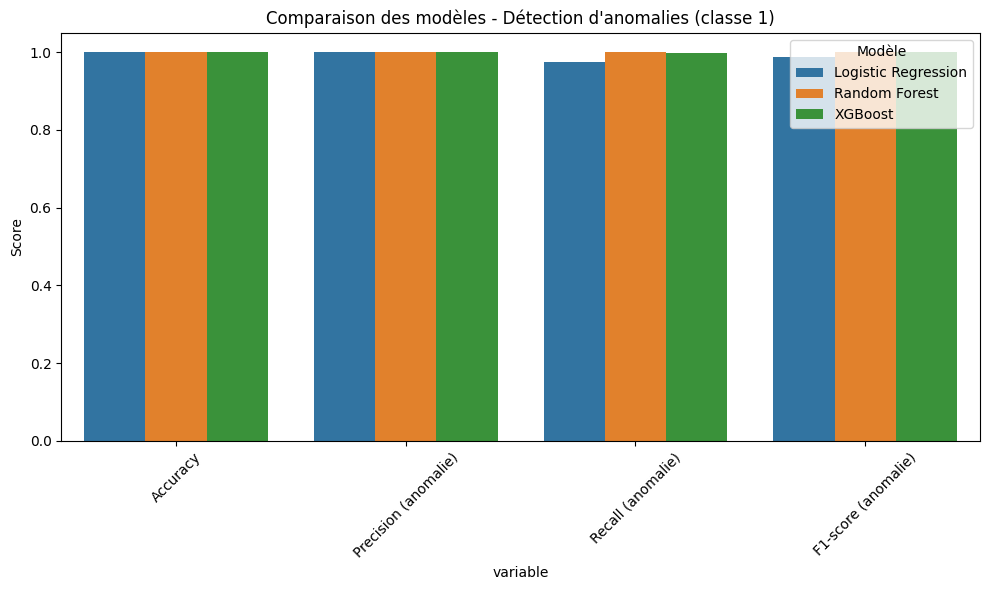

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from sklearn.metrics import classification_report
from tabulate import tabulate

# 1. 📥 Charger les données prêtes
csv_path = "/content/drive/MyDrive/Projet_NASA_Logs/exports/logs_model_training_ready.csv"
df = pd.read_csv(csv_path)

# 2. 🎯 Définir les features et la cible
features = ["nb_total", "prop_erreurs", "urls_uniques", "bytes_total"]
X = df[features]
y = df["label"]

# 3. 📁 Dossier des modèles
models_dir = "/content/drive/MyDrive/Projet_NASA_Logs/models"
model_paths = {
    "Logistic Regression": os.path.join(models_dir, "logistic_regression.joblib"),
    "Random Forest": os.path.join(models_dir, "random_forest.joblib"),
    "XGBoost": os.path.join(models_dir, "xgboost.joblib")
}

# 4. 📊 Évaluation des modèles
results = []

for name, path in model_paths.items():
    model = joblib.load(path)
    y_pred = model.predict(X)
    report = classification_report(y, y_pred, output_dict=True)

    results.append({
        "Modèle": name,
        "Accuracy": round(report["accuracy"], 4),
        "Precision (anomalie)": round(report.get("1", {}).get("precision", 0), 4),
        "Recall (anomalie)": round(report.get("1", {}).get("recall", 0), 4),
        "F1-score (anomalie)": round(report.get("1", {}).get("f1-score", 0), 4)
    })

# 5. 📋 Affichage du tableau de comparaison
df_results = pd.DataFrame(results)
print("\n📊 Résultats comparatifs :\n")
print(tabulate(df_results, headers='keys', tablefmt='fancy_grid'))

# 6. 📈 Graphe comparatif
plt.figure(figsize=(10,6))
sns.barplot(data=df_results.melt(id_vars="Modèle"), x="variable", y="value", hue="Modèle")
plt.title("Comparaison des modèles - Détection d'anomalies (classe 1)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 500x400 with 0 Axes>

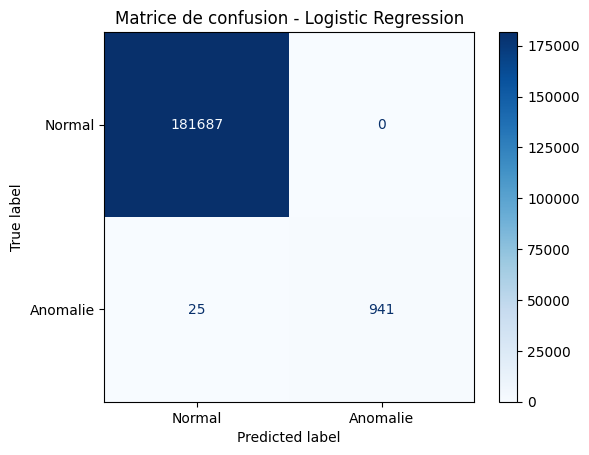

<Figure size 500x400 with 0 Axes>

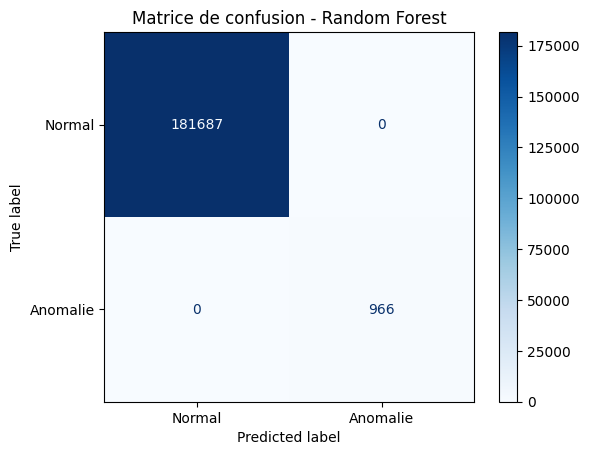

<Figure size 500x400 with 0 Axes>

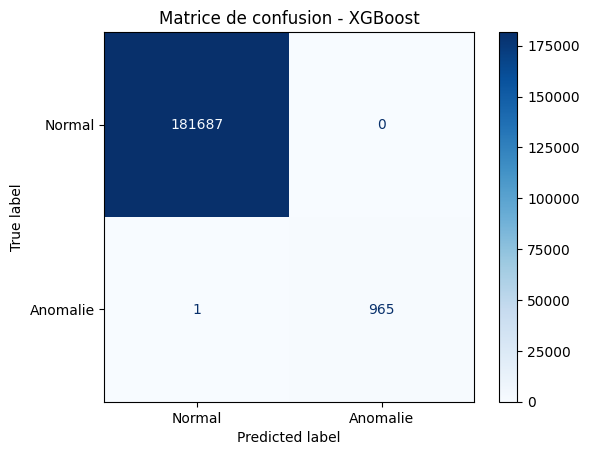

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Rechargement des modèles
for name, path in model_paths.items():
    model = joblib.load(path)
    y_pred = model.predict(X)

    # Matrice de confusion
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomalie"])

    plt.figure(figsize=(5, 4))
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f"Matrice de confusion - {name}")
    plt.grid(False)
    plt.show()

---
# **🏆 Étape 5 - Sélection du meilleur modèle**

- Le modèle retenu sera celui avec le meilleur F1 ou AUC.
- Il sera exporté pour déploiement avec eland.

**🧾 Analyse & Recommandation**

**Random Forest**

- 🎯 Parfaitement équilibré sur les 3 métriques critiques (Precision, Recall, F1).

- ✅ Idéal si on veut maximiser à la fois les détections et limiter les faux positifs.

- ⚠️ Peut être plus lourd en ressources pour le déploiement.

**XGBoost**

- ⚙️ Performances quasi parfaites, très proche de Random Forest.

- ✅ Recommandé si on veut plus de contrôle et flexibilité (tuning avancé possible).

- 📈 Légèrement moins bon en Recall que Random Forest (0.999 vs 1.0).

**Logistic Regression**

- 💡 Très bon baseline, simple à interpréter.
- ❗ Moins bon en Recall (0.9741), donc plus de risques de louper certaines anomalies.
- ✅ Intéressant si on recherche la simplicité, vitesse et interprétabilité.


✅ **Conclusion**

Le **Random Forest** est le meilleur choix ici pour une détection de menaces fiable, avec 0 faux négatifs ni positifs.

# **🛠️ Étape 6 - Envoi du modèle dans ElasticSearch avec Eland**

3. Importation dans Elasticsearch du modele choisit

On va importer le modèle entraîné au format .joblib avec eland_import_hub_model dans la zone training Models de ElasticSearch

In [12]:
!pip install eland

  Using cached elasticsearch-9.0.1-py3-none-any.whl.metadata (8.5 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached elasticsearch-9.0.1-py3-none-any.whl (905 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
  Attempting uninstall: elasticsearch
    Found existing installation: elasticsearch 8.18.1
    Uninstalling elasticsearch-8.18.1:
      Successfully uninstalled elasticsearch-8.18.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
elasticsearch-dsl 8.18.0 requires elasticsearch<9.0.0,>=8.0.0, but you have elasticsearch 9.0.1 which is incompatible.
thinc 9.1.1 requires numpy<3.0.0,>=2.0.0, but y

In [25]:
!eland_import_model \
--url  "https://my-elasticsearch-project-d88606.es.us-east-1.aws.elastic.cloud:443" \
--api-key "dHFOSHNwWUJTYlhUTWUwWjVwa1M6RlcwWTdIQ1Q0QW5DaWlTcE5TeC1idw==" \
--model-path /content/drive/MyDrive/Projet_NASA_Logs/models/xgboost.joblib \
--model-type xgboost \
--output-model-id xgboost_nasa_v1 \
--task-type classification

/bin/bash: line 1: eland_import_model: command not found


In [2]:
!pip show numpy

Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentation and/or other materials provided
       with the distribution.

    * Neither the name of the NumPy Developers nor the names of any
       contributors may be used to endorse or promote products derived
       from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYR

In [16]:
!pip show eland

Name: eland
Version: 9.0.1
Summary: Python Client and Toolkit for DataFrames, Big Data, Machine Learning and ETL in Elasticsearch
Home-page: https://github.com/elastic/eland
Author: Steve Dodson
Author-email: steve.dodson@elastic.co
License: Apache-2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: elasticsearch, matplotlib, numpy, packaging, pandas
Required-by: 


In [17]:
import eland
print(dir(eland))

['DataFrame', 'ElandDeprecationWarning', 'Index', 'NDFrame', 'Series', 'SortOrder', '__all__', '__author__', '__author_email__', '__builtins__', '__cached__', '__description__', '__doc__', '__file__', '__loader__', '__maintainer__', '__maintainer_email__', '__name__', '__package__', '__path__', '__spec__', '__title__', '__url__', '__version__', '_version', 'actions', 'arithmetics', 'common', 'csv_to_eland', 'dataframe', 'eland_to_pandas', 'etl', 'field_mappings', 'filter', 'groupby', 'index', 'ml', 'ndframe', 'operations', 'pandas_to_eland', 'plotting', 'query', 'query_compiler', 'series', 'tasks', 'utils', 'warnings']


In [18]:
ls /usr/local/lib/python3.11/dist-packages/eland/ml

common.py    ltr/         _model_serializer.py  __pycache__/  transformers/
__init__.py  ml_model.py  _optional.py          pytorch/


In [19]:
!pip show xgboost

Name: xgboost
Version: 1.7.6
Summary: XGBoost Python Package
Home-page: https://github.com/dmlc/xgboost
Author: 
Author-email: 
License: Apache-2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, scipy
Required-by: 


In [22]:
from joblib import load
import numpy as np
import pandas as pd
import elasticsearch
from eland.ml import MLModel



# 1. Connexion à Elasticsearch
es_client = elasticsearch.Elasticsearch(
    "https://my-elasticsearch-project-d88606.es.us-east-1.aws.elastic.cloud:443",
    api_key="dHFOSHNwWUJTYlhUTWUwWjVwa1M6RlcwWTdIQ1Q0QW5DaWlTcE5TeC1idw=="
)

# 2. Chargement du modèle XGBoost
model_path = "/content/drive/MyDrive/Projet_NASA_Logs/models/xgboost.joblib"
xgb_model = load(model_path)

# 3. Préparation des features et labels
feature_names = ["nb_total", "prop_erreurs", "urls_uniques", "bytes_total"]
df = pd.read_csv("/content/drive/MyDrive/Projet_NASA_Logs/exports/logs_model_training_ready.csv")
classification_labels = sorted(df["label"].unique().tolist())

# 4. Définir manuellement l’attribut classes_
#    pour que Eland puisse l’utiliser
xgb_model.classes_ = np.array(classification_labels)

# 5. Import dans Elasticsearch (écrase automatiquement si model_id identique)
es_model = MLModel.import_model(
    es_client,
    model_id = "xgboost_nasa_v1",
    model=xgb_model,
    feature_names=feature_names,
    classification_labels=classification_labels,
    es_if_exists="replace"
)

# 6. Vérification de l’import
print("Import réussi :", es_model.exists_model())

# 7. Test rapide de prédiction
X_test = pd.read_csv("/content/drive/MyDrive/Projet_NASA_Logs/exports/X_test.csv")
# Définir l'attribut manquant pour pouvoir appeler predict()
xgb_model.use_label_encoder = False
xgb_model.gpu_id = None
xgb_model.predictor  = "auto"
preds = xgb_model.predict(X_test[feature_names])
print("Quelques prédictions :", preds[:10])

[15:05:27] WARNING: ../src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.

Import réussi : True
Quelques prédictions : [0 0 0 0 0 0 0 0 0 0]


In [20]:
# Liste tous les modèles entraînés côté cluster
print(es_client.ml.get_trained_models())

{'count': 2, 'trained_model_configs': [{'model_id': 'lang_ident_model_1', 'model_type': 'lang_ident', 'created_by': '_xpack', 'version': '7.6.0', 'create_time': 1575548914594, 'model_size_bytes': 1053992, 'estimated_operations': 39629, 'license_level': 'basic', 'description': 'Model used for identifying language from arbitrary input text.', 'tags': ['lang_ident', 'prepackaged'], 'input': {'field_names': ['text']}, 'inference_config': {'classification': {'num_top_classes': 0, 'top_classes_results_field': 'top_classes', 'results_field': 'predicted_value', 'num_top_feature_importance_values': 0, 'prediction_field_type': 'string'}}}, {'model_id': 'xgboost_nasa_v1', 'model_type': 'tree_ensemble', 'created_by': 'api_user', 'version': '12.0.0', 'create_time': 1747061710271, 'model_size_bytes': 90952, 'estimated_operations': 205, 'license_level': 'platinum', 'tags': [], 'input': {'field_names': ['nb_total', 'prop_erreurs', 'urls_uniques', 'bytes_total']}, 'inference_config': {'classification':

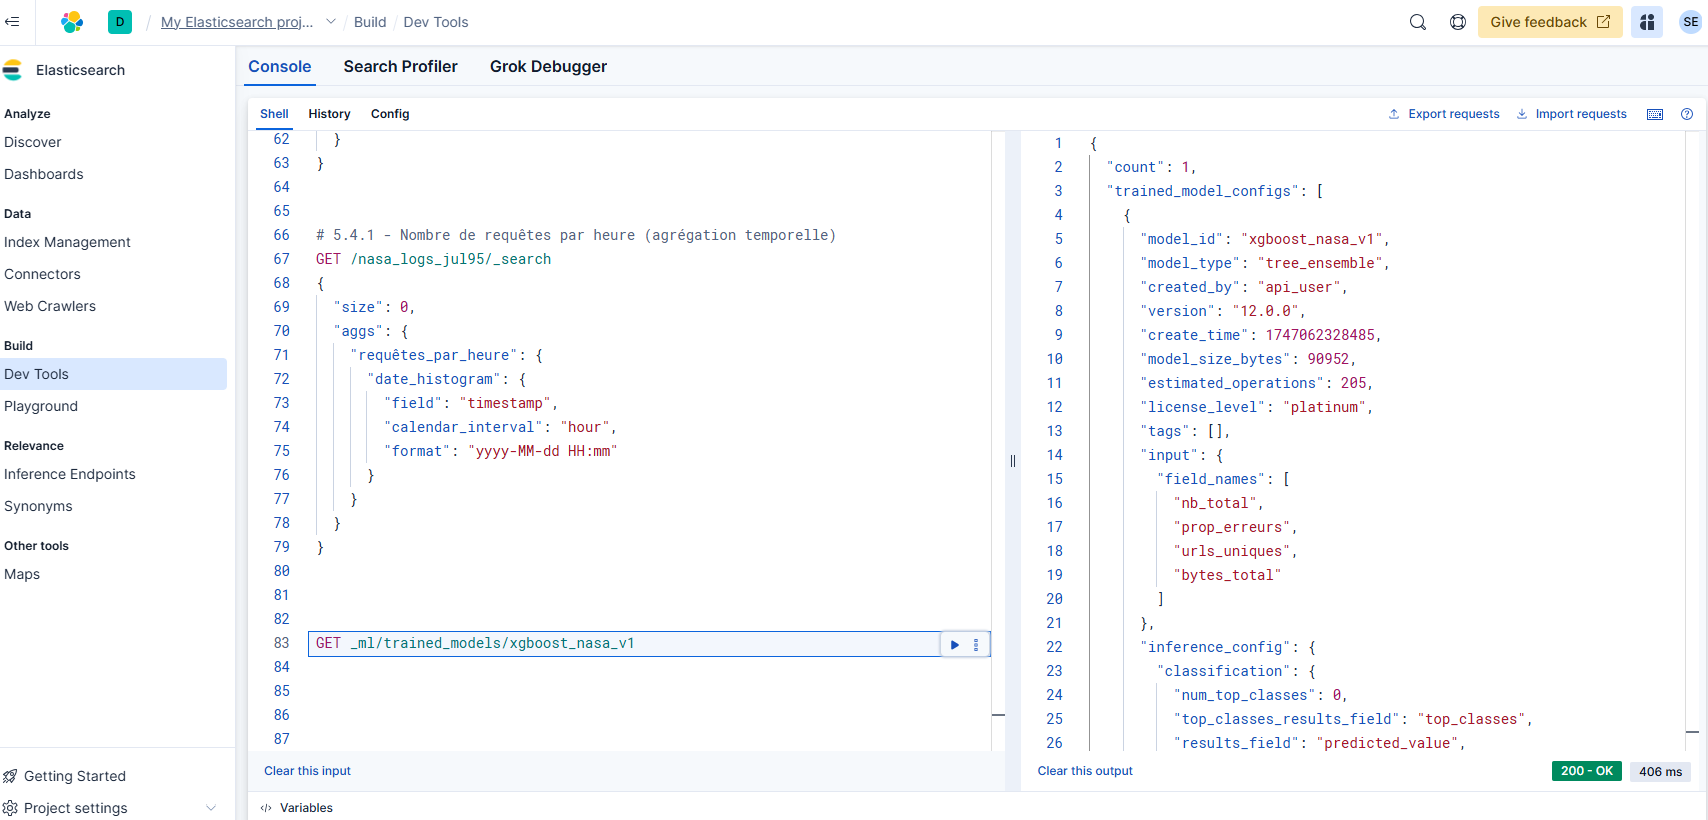

In [ ]:
#exécution de l'inférence depuis colab
from elasticsearch import Elasticsearch

body = {
  "docs": [
    {
      "nb_total": 10,
      "prop_erreurs": 0.1,
      "urls_uniques": 3,
      "bytes_total": 2048
    }
  ]
}

res = es.ml.infer_trained_model("xgboost_nasa_v1", body=body)
print(res["inference_results"])


In [ ]:
from elasticsearch import Elasticsearch

body = {
    "docs": [
        {
            "nb_total": 10,
            "prop_erreurs": 0.1,
            "urls_uniques": 3,
            "bytes_total": 2048
        }
    ]
}

res = es.ml.infer_trained_model("xgboost_nasa_v1", body=body)
print(res["inference_results"])

FIN DU PROJET